# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [31]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

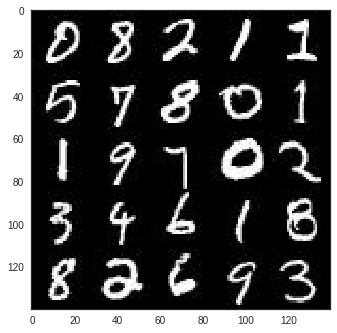

In [46]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from glob import glob
from matplotlib import pyplot
import seaborn as sns
sns.set_style("white")

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

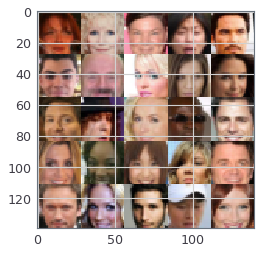

In [33]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [34]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [79]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    real_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="real_images")
    z_input = tf.placeholder(tf.float32, (None, z_dim), name="z_input")
    lr = tf.placeholder(tf.float32, name="learning_rate")

    return real_images, z_input, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/philip/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/philip/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/philip/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>\n    app.launch_new_instance()', 'File "/home/philip/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/philip/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/philip/anaconda3/lib/python3.6/site-packages/zmq/eventloop/

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [36]:
import pdb

In [98]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope("discriminator", reuse=reuse):
        x = tf.layers.conv2d(images, 64, 3, 2, padding="same") # 16x16x64 and 14x14x64
#         x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d(x, 128, 3, 2, padding="same") # 8x8x64 and 7x7x64
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d(x, 256, 3, 2, padding="same") # 4x4x64 and 4x4x64
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d(x, 512, 3, 2, padding="same") # 4x4x64 and 4x4x64
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(0.2*x, x)
#         pdb.set_trace()
        
        x = tf.reshape(x, (-1, 2*2*512))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)
#         x = tf.layers.conv2d(x, 128, 5, 2, use_bias=False) # ?x?x64
#         x = tf.layers.batch_normalization(x, training=True)
#         x = tf.maximum(0.2*x, x)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


In [90]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope("discriminator", reuse=reuse):
        x = tf.layers.conv2d(images, 64, 5, 2, padding="same") # 16x16x64 and 14x14x64
#         x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d(x, 128, 5, 2, padding="same") # 8x8x64 and 7x7x64
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(0.2*x, x)
        
#         x = tf.layers.conv2d(x, 256, 3, 2, padding="same") # 4x4x64 and 4x4x64
#         x = tf.layers.batch_normalization(x, training=True)
#         x = tf.maximum(0.2*x, x)
        
#         x = tf.layers.conv2d(x, 512, 3, 2, padding="same") # 4x4x64 and 4x4x64
#         x = tf.layers.batch_normalization(x, training=True)
#         x = tf.maximum(0.2*x, x)
#         pdb.set_trace()
        
        x = tf.reshape(x, (-1, 2*2*512))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)
#         x = tf.layers.conv2d(x, 128, 5, 2, use_bias=False) # ?x?x64
#         x = tf.layers.batch_normalization(x, training=True)
#         x = tf.maximum(0.2*x, x)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [99]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope("generator", reuse=not is_train):
        x = tf.layers.dense(z, 2*2*512)
        x = tf.reshape(x, (-1, 2, 2, 512))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d_transpose(x, 256, 3, 2, padding="same") # 8x8x128
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d_transpose(x, 128, 4, 1, padding="valid") # 8x8x128
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2*x, x)

        x = tf.layers.conv2d_transpose(x, 64, 3, 2, padding="same") # 16x16x64
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2*x, x)

        x = tf.layers.conv2d_transpose(x, out_channel_dim, 5, 2, padding="same") # 32x32x out_channel_dim
    
    return tf.tanh(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


In [91]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope("generator", reuse=not is_train):
        x = tf.layers.dense(z, 7*7*256)
        x = tf.reshape(x, (-1, 7, 7, 256))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d_transpose(x, 128, 5, 2, padding="same") # 8x8x128
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(0.2*x, x)
        
#         x = tf.layers.conv2d_transpose(x, 128, 5, 2, padding="same") # 8x8x128
#         x = tf.layers.batch_normalization(x, training=is_train)
#         x = tf.maximum(0.2*x, x)

#         x = tf.layers.conv2d_transpose(x, 64, 3, 2, padding="same") # 16x16x64
#         x = tf.layers.batch_normalization(x, training=is_train)
#         x = tf.maximum(0.2*x, x)

        x = tf.layers.conv2d_transpose(x, out_channel_dim, 5, 2, padding="same") # 32x32x out_channel_dim
    
    return tf.tanh(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [92]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_output = generator(input_z, out_channel_dim)
    d_real_output, d_real_logits = discriminator(input_real)
    d_fake_output, d_fake_logits = discriminator(g_output, reuse=True)
    
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_real_logits), 
                                                                         logits=d_real_logits))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_fake_logits), 
                                                                         logits=d_fake_logits))
    d_loss = d_real_loss + d_fake_loss
#     pdb.set_trace()
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_fake_logits), logits=d_fake_logits))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [93]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    all_vars = tf.trainable_variables()
    d_vars = [var for var in all_vars if var.name.startswith("discriminator")]
    g_vars = [var for var in all_vars if var.name.startswith("generator")]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [94]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [95]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    _, image_width, image_height, image_channels = data_shape
    real_images_input, z_input, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(real_images_input, z_input, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    iteration = 1
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
#                 pdb.set_trace()
                z_batch = np.random.uniform(-1, 1, (batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={real_images_input: batch_images, z_input: z_batch, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={real_images_input: batch_images, z_input: z_batch, lr: learning_rate})
                if iteration%10==0: 
                    d_batch_loss = d_loss.eval(feed_dict={real_images_input: batch_images, z_input: z_batch})
                    g_batch_loss = g_loss.eval(feed_dict={z_input: z_batch})
                    print("Epoch {:<3} Iteration {:<4} Generator Loss: {:.3f}, Discriminator Loss: {:.3f}".format(epoch_i, iteration, g_batch_loss, d_batch_loss))
                if iteration%100==0: 
                    show_generator_output(sess, 16, z_input, image_channels, data_image_mode)
                iteration += 1
               

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0   Iteration 10   Generator Loss: 0.436, Discriminator Loss: 1.607
Epoch 0   Iteration 20   Generator Loss: 0.487, Discriminator Loss: 1.529
Epoch 0   Iteration 30   Generator Loss: 0.576, Discriminator Loss: 1.415
Epoch 0   Iteration 40   Generator Loss: 0.644, Discriminator Loss: 1.258
Epoch 0   Iteration 50   Generator Loss: 0.613, Discriminator Loss: 1.316
Epoch 0   Iteration 60   Generator Loss: 0.660, Discriminator Loss: 1.257
Epoch 0   Iteration 70   Generator Loss: 0.690, Discriminator Loss: 1.229
Epoch 0   Iteration 80   Generator Loss: 0.712, Discriminator Loss: 1.199
Epoch 0   Iteration 90   Generator Loss: 0.725, Discriminator Loss: 1.193
Epoch 0   Iteration 100  Generator Loss: 0.779, Discriminator Loss: 1.160


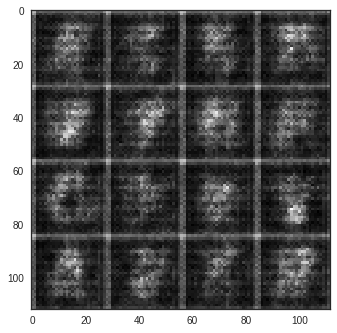

Epoch 0   Iteration 110  Generator Loss: 0.766, Discriminator Loss: 1.148
Epoch 0   Iteration 120  Generator Loss: 0.774, Discriminator Loss: 1.152
Epoch 0   Iteration 130  Generator Loss: 0.772, Discriminator Loss: 1.194
Epoch 0   Iteration 140  Generator Loss: 0.750, Discriminator Loss: 1.229
Epoch 0   Iteration 150  Generator Loss: 0.736, Discriminator Loss: 1.234
Epoch 0   Iteration 160  Generator Loss: 0.749, Discriminator Loss: 1.241
Epoch 0   Iteration 170  Generator Loss: 0.766, Discriminator Loss: 1.214
Epoch 0   Iteration 180  Generator Loss: 0.740, Discriminator Loss: 1.263
Epoch 0   Iteration 190  Generator Loss: 0.744, Discriminator Loss: 1.297
Epoch 0   Iteration 200  Generator Loss: 0.751, Discriminator Loss: 1.250


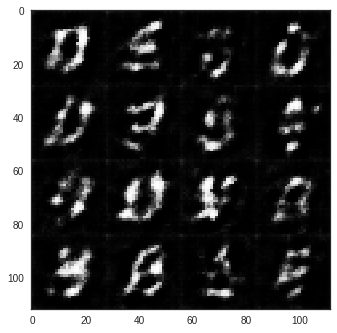

Epoch 0   Iteration 210  Generator Loss: 0.767, Discriminator Loss: 1.245
Epoch 0   Iteration 220  Generator Loss: 0.746, Discriminator Loss: 1.261
Epoch 0   Iteration 230  Generator Loss: 0.754, Discriminator Loss: 1.262
Epoch 0   Iteration 240  Generator Loss: 0.745, Discriminator Loss: 1.250
Epoch 0   Iteration 250  Generator Loss: 0.719, Discriminator Loss: 1.288
Epoch 0   Iteration 260  Generator Loss: 0.743, Discriminator Loss: 1.279
Epoch 0   Iteration 270  Generator Loss: 0.734, Discriminator Loss: 1.278
Epoch 0   Iteration 280  Generator Loss: 0.766, Discriminator Loss: 1.262
Epoch 0   Iteration 290  Generator Loss: 0.725, Discriminator Loss: 1.286
Epoch 0   Iteration 300  Generator Loss: 0.751, Discriminator Loss: 1.260


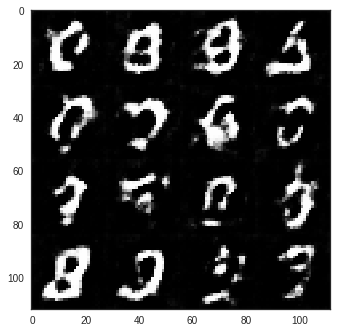

Epoch 0   Iteration 310  Generator Loss: 0.751, Discriminator Loss: 1.277
Epoch 0   Iteration 320  Generator Loss: 0.724, Discriminator Loss: 1.289
Epoch 0   Iteration 330  Generator Loss: 0.759, Discriminator Loss: 1.259
Epoch 0   Iteration 340  Generator Loss: 0.709, Discriminator Loss: 1.308
Epoch 0   Iteration 350  Generator Loss: 0.748, Discriminator Loss: 1.288
Epoch 0   Iteration 360  Generator Loss: 0.746, Discriminator Loss: 1.263
Epoch 0   Iteration 370  Generator Loss: 0.767, Discriminator Loss: 1.260
Epoch 0   Iteration 380  Generator Loss: 0.740, Discriminator Loss: 1.299
Epoch 0   Iteration 390  Generator Loss: 0.745, Discriminator Loss: 1.300
Epoch 0   Iteration 400  Generator Loss: 0.739, Discriminator Loss: 1.296


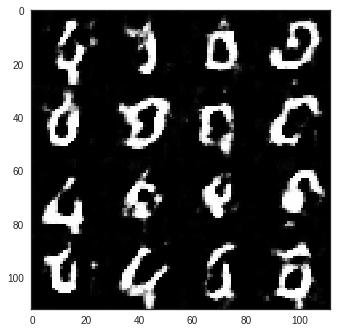

Epoch 0   Iteration 410  Generator Loss: 0.721, Discriminator Loss: 1.294
Epoch 0   Iteration 420  Generator Loss: 0.795, Discriminator Loss: 1.217
Epoch 0   Iteration 430  Generator Loss: 0.752, Discriminator Loss: 1.270
Epoch 0   Iteration 440  Generator Loss: 0.745, Discriminator Loss: 1.260
Epoch 0   Iteration 450  Generator Loss: 0.773, Discriminator Loss: 1.217
Epoch 0   Iteration 460  Generator Loss: 0.771, Discriminator Loss: 1.231
Epoch 0   Iteration 470  Generator Loss: 0.775, Discriminator Loss: 1.239
Epoch 0   Iteration 480  Generator Loss: 0.746, Discriminator Loss: 1.260
Epoch 0   Iteration 490  Generator Loss: 0.769, Discriminator Loss: 1.241
Epoch 0   Iteration 500  Generator Loss: 0.773, Discriminator Loss: 1.226


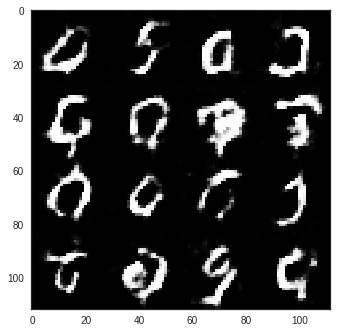

Epoch 0   Iteration 510  Generator Loss: 0.790, Discriminator Loss: 1.190
Epoch 0   Iteration 520  Generator Loss: 0.785, Discriminator Loss: 1.231
Epoch 0   Iteration 530  Generator Loss: 0.765, Discriminator Loss: 1.240
Epoch 0   Iteration 540  Generator Loss: 0.781, Discriminator Loss: 1.232
Epoch 0   Iteration 550  Generator Loss: 0.748, Discriminator Loss: 1.237
Epoch 0   Iteration 560  Generator Loss: 0.760, Discriminator Loss: 1.274
Epoch 0   Iteration 570  Generator Loss: 0.779, Discriminator Loss: 1.217
Epoch 0   Iteration 580  Generator Loss: 0.776, Discriminator Loss: 1.234
Epoch 0   Iteration 590  Generator Loss: 0.796, Discriminator Loss: 1.227
Epoch 0   Iteration 600  Generator Loss: 0.764, Discriminator Loss: 1.232


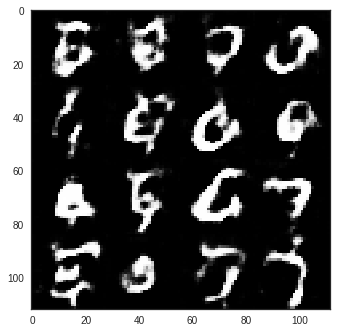

Epoch 0   Iteration 610  Generator Loss: 0.784, Discriminator Loss: 1.220
Epoch 0   Iteration 620  Generator Loss: 0.778, Discriminator Loss: 1.247
Epoch 0   Iteration 630  Generator Loss: 0.783, Discriminator Loss: 1.214
Epoch 0   Iteration 640  Generator Loss: 0.798, Discriminator Loss: 1.251
Epoch 0   Iteration 650  Generator Loss: 0.822, Discriminator Loss: 1.193
Epoch 0   Iteration 660  Generator Loss: 0.768, Discriminator Loss: 1.210
Epoch 0   Iteration 670  Generator Loss: 0.790, Discriminator Loss: 1.223
Epoch 0   Iteration 680  Generator Loss: 0.790, Discriminator Loss: 1.248
Epoch 0   Iteration 690  Generator Loss: 0.823, Discriminator Loss: 1.204
Epoch 0   Iteration 700  Generator Loss: 0.822, Discriminator Loss: 1.191


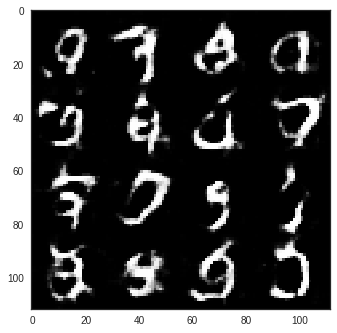

Epoch 0   Iteration 710  Generator Loss: 0.830, Discriminator Loss: 1.195
Epoch 0   Iteration 720  Generator Loss: 0.771, Discriminator Loss: 1.247
Epoch 0   Iteration 730  Generator Loss: 0.800, Discriminator Loss: 1.192
Epoch 0   Iteration 740  Generator Loss: 0.774, Discriminator Loss: 1.248
Epoch 0   Iteration 750  Generator Loss: 0.819, Discriminator Loss: 1.167
Epoch 0   Iteration 760  Generator Loss: 0.803, Discriminator Loss: 1.186
Epoch 0   Iteration 770  Generator Loss: 0.782, Discriminator Loss: 1.202
Epoch 0   Iteration 780  Generator Loss: 0.833, Discriminator Loss: 1.167
Epoch 0   Iteration 790  Generator Loss: 0.793, Discriminator Loss: 1.190
Epoch 0   Iteration 800  Generator Loss: 0.784, Discriminator Loss: 1.218


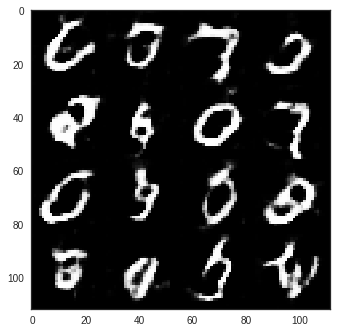

Epoch 0   Iteration 810  Generator Loss: 0.782, Discriminator Loss: 1.180
Epoch 0   Iteration 820  Generator Loss: 0.815, Discriminator Loss: 1.172
Epoch 0   Iteration 830  Generator Loss: 0.808, Discriminator Loss: 1.182
Epoch 0   Iteration 840  Generator Loss: 0.774, Discriminator Loss: 1.213
Epoch 0   Iteration 850  Generator Loss: 0.796, Discriminator Loss: 1.159
Epoch 0   Iteration 860  Generator Loss: 0.855, Discriminator Loss: 1.209
Epoch 0   Iteration 870  Generator Loss: 0.805, Discriminator Loss: 1.180
Epoch 0   Iteration 880  Generator Loss: 0.831, Discriminator Loss: 1.186
Epoch 0   Iteration 890  Generator Loss: 0.817, Discriminator Loss: 1.178
Epoch 0   Iteration 900  Generator Loss: 0.821, Discriminator Loss: 1.142


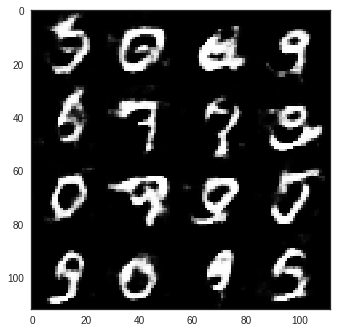

Epoch 0   Iteration 910  Generator Loss: 0.790, Discriminator Loss: 1.166
Epoch 0   Iteration 920  Generator Loss: 0.811, Discriminator Loss: 1.199
Epoch 0   Iteration 930  Generator Loss: 0.846, Discriminator Loss: 1.176
Epoch 1   Iteration 940  Generator Loss: 0.802, Discriminator Loss: 1.189
Epoch 1   Iteration 950  Generator Loss: 0.830, Discriminator Loss: 1.181
Epoch 1   Iteration 960  Generator Loss: 0.814, Discriminator Loss: 1.147
Epoch 1   Iteration 970  Generator Loss: 0.838, Discriminator Loss: 1.185
Epoch 1   Iteration 980  Generator Loss: 0.840, Discriminator Loss: 1.161
Epoch 1   Iteration 990  Generator Loss: 0.808, Discriminator Loss: 1.185
Epoch 1   Iteration 1000 Generator Loss: 0.824, Discriminator Loss: 1.176


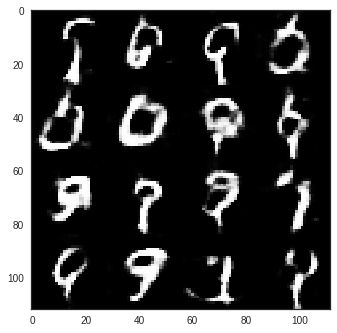

Epoch 1   Iteration 1010 Generator Loss: 0.835, Discriminator Loss: 1.177
Epoch 1   Iteration 1020 Generator Loss: 0.821, Discriminator Loss: 1.200
Epoch 1   Iteration 1030 Generator Loss: 0.825, Discriminator Loss: 1.166
Epoch 1   Iteration 1040 Generator Loss: 0.839, Discriminator Loss: 1.165
Epoch 1   Iteration 1050 Generator Loss: 0.830, Discriminator Loss: 1.173
Epoch 1   Iteration 1060 Generator Loss: 0.820, Discriminator Loss: 1.223
Epoch 1   Iteration 1070 Generator Loss: 0.838, Discriminator Loss: 1.190
Epoch 1   Iteration 1080 Generator Loss: 0.796, Discriminator Loss: 1.155
Epoch 1   Iteration 1090 Generator Loss: 0.823, Discriminator Loss: 1.205
Epoch 1   Iteration 1100 Generator Loss: 0.815, Discriminator Loss: 1.155


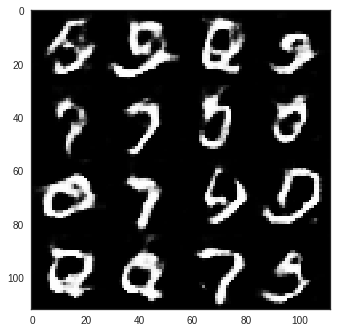

Epoch 1   Iteration 1110 Generator Loss: 0.815, Discriminator Loss: 1.157
Epoch 1   Iteration 1120 Generator Loss: 0.823, Discriminator Loss: 1.173
Epoch 1   Iteration 1130 Generator Loss: 0.854, Discriminator Loss: 1.132
Epoch 1   Iteration 1140 Generator Loss: 0.814, Discriminator Loss: 1.119
Epoch 1   Iteration 1150 Generator Loss: 0.837, Discriminator Loss: 1.156
Epoch 1   Iteration 1160 Generator Loss: 0.828, Discriminator Loss: 1.141
Epoch 1   Iteration 1170 Generator Loss: 0.806, Discriminator Loss: 1.152
Epoch 1   Iteration 1180 Generator Loss: 0.807, Discriminator Loss: 1.246
Epoch 1   Iteration 1190 Generator Loss: 0.795, Discriminator Loss: 1.190
Epoch 1   Iteration 1200 Generator Loss: 0.814, Discriminator Loss: 1.196


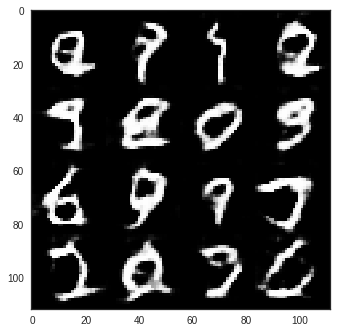

Epoch 1   Iteration 1210 Generator Loss: 0.848, Discriminator Loss: 1.137
Epoch 1   Iteration 1220 Generator Loss: 0.871, Discriminator Loss: 1.128
Epoch 1   Iteration 1230 Generator Loss: 0.857, Discriminator Loss: 1.202
Epoch 1   Iteration 1240 Generator Loss: 0.848, Discriminator Loss: 1.197
Epoch 1   Iteration 1250 Generator Loss: 0.884, Discriminator Loss: 1.199
Epoch 1   Iteration 1260 Generator Loss: 0.818, Discriminator Loss: 1.204
Epoch 1   Iteration 1270 Generator Loss: 0.839, Discriminator Loss: 1.204
Epoch 1   Iteration 1280 Generator Loss: 0.821, Discriminator Loss: 1.162
Epoch 1   Iteration 1290 Generator Loss: 0.806, Discriminator Loss: 1.160
Epoch 1   Iteration 1300 Generator Loss: 0.794, Discriminator Loss: 1.191


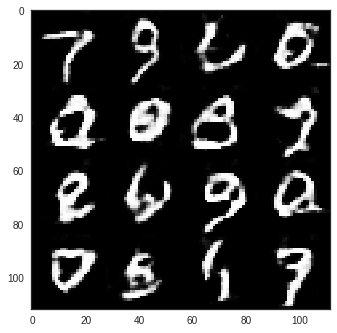

Epoch 1   Iteration 1310 Generator Loss: 0.867, Discriminator Loss: 1.174
Epoch 1   Iteration 1320 Generator Loss: 0.836, Discriminator Loss: 1.167
Epoch 1   Iteration 1330 Generator Loss: 0.834, Discriminator Loss: 1.202
Epoch 1   Iteration 1340 Generator Loss: 0.824, Discriminator Loss: 1.258
Epoch 1   Iteration 1350 Generator Loss: 0.859, Discriminator Loss: 1.180
Epoch 1   Iteration 1360 Generator Loss: 0.764, Discriminator Loss: 1.193
Epoch 1   Iteration 1370 Generator Loss: 0.875, Discriminator Loss: 1.180
Epoch 1   Iteration 1380 Generator Loss: 0.842, Discriminator Loss: 1.165
Epoch 1   Iteration 1390 Generator Loss: 0.825, Discriminator Loss: 1.101
Epoch 1   Iteration 1400 Generator Loss: 0.809, Discriminator Loss: 1.140


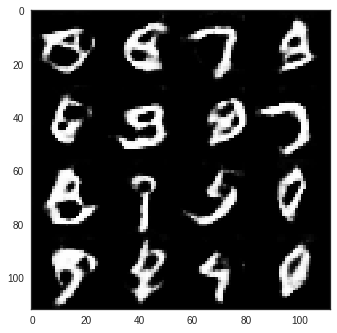

Epoch 1   Iteration 1410 Generator Loss: 0.850, Discriminator Loss: 1.157
Epoch 1   Iteration 1420 Generator Loss: 0.831, Discriminator Loss: 1.161
Epoch 1   Iteration 1430 Generator Loss: 0.862, Discriminator Loss: 1.200
Epoch 1   Iteration 1440 Generator Loss: 0.891, Discriminator Loss: 1.168
Epoch 1   Iteration 1450 Generator Loss: 0.840, Discriminator Loss: 1.156
Epoch 1   Iteration 1460 Generator Loss: 0.835, Discriminator Loss: 1.130
Epoch 1   Iteration 1470 Generator Loss: 0.878, Discriminator Loss: 1.170
Epoch 1   Iteration 1480 Generator Loss: 0.860, Discriminator Loss: 1.165
Epoch 1   Iteration 1490 Generator Loss: 0.820, Discriminator Loss: 1.165
Epoch 1   Iteration 1500 Generator Loss: 0.838, Discriminator Loss: 1.289


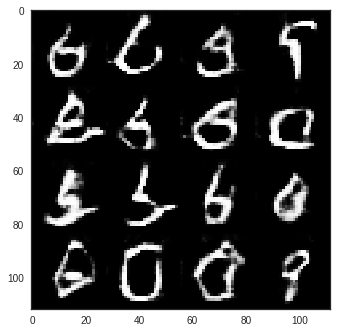

Epoch 1   Iteration 1510 Generator Loss: 0.857, Discriminator Loss: 1.160
Epoch 1   Iteration 1520 Generator Loss: 0.863, Discriminator Loss: 1.131
Epoch 1   Iteration 1530 Generator Loss: 0.770, Discriminator Loss: 1.193
Epoch 1   Iteration 1540 Generator Loss: 0.806, Discriminator Loss: 1.144
Epoch 1   Iteration 1550 Generator Loss: 0.847, Discriminator Loss: 1.170
Epoch 1   Iteration 1560 Generator Loss: 0.831, Discriminator Loss: 1.178
Epoch 1   Iteration 1570 Generator Loss: 0.830, Discriminator Loss: 1.162
Epoch 1   Iteration 1580 Generator Loss: 0.832, Discriminator Loss: 1.141
Epoch 1   Iteration 1590 Generator Loss: 0.841, Discriminator Loss: 1.160
Epoch 1   Iteration 1600 Generator Loss: 0.968, Discriminator Loss: 1.206


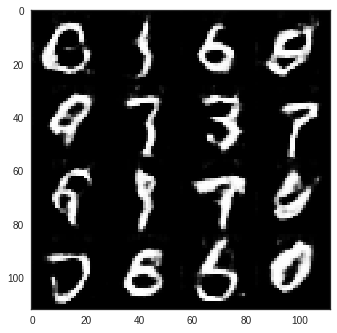

Epoch 1   Iteration 1610 Generator Loss: 0.785, Discriminator Loss: 1.164
Epoch 1   Iteration 1620 Generator Loss: 0.762, Discriminator Loss: 1.178
Epoch 1   Iteration 1630 Generator Loss: 0.817, Discriminator Loss: 1.189
Epoch 1   Iteration 1640 Generator Loss: 0.740, Discriminator Loss: 1.194
Epoch 1   Iteration 1650 Generator Loss: 0.812, Discriminator Loss: 1.146
Epoch 1   Iteration 1660 Generator Loss: 0.853, Discriminator Loss: 1.169
Epoch 1   Iteration 1670 Generator Loss: 0.820, Discriminator Loss: 1.176
Epoch 1   Iteration 1680 Generator Loss: 0.817, Discriminator Loss: 1.186
Epoch 1   Iteration 1690 Generator Loss: 0.867, Discriminator Loss: 1.177
Epoch 1   Iteration 1700 Generator Loss: 0.793, Discriminator Loss: 1.160


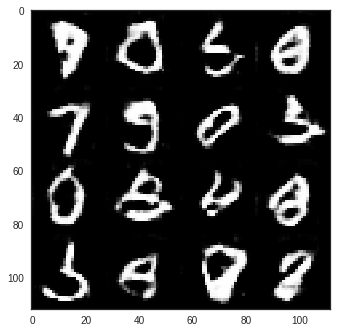

Epoch 1   Iteration 1710 Generator Loss: 0.777, Discriminator Loss: 1.243
Epoch 1   Iteration 1720 Generator Loss: 0.861, Discriminator Loss: 1.166
Epoch 1   Iteration 1730 Generator Loss: 0.772, Discriminator Loss: 1.211
Epoch 1   Iteration 1740 Generator Loss: 0.793, Discriminator Loss: 1.180
Epoch 1   Iteration 1750 Generator Loss: 0.797, Discriminator Loss: 1.202
Epoch 1   Iteration 1760 Generator Loss: 0.789, Discriminator Loss: 1.233
Epoch 1   Iteration 1770 Generator Loss: 0.814, Discriminator Loss: 1.166
Epoch 1   Iteration 1780 Generator Loss: 0.850, Discriminator Loss: 1.119
Epoch 1   Iteration 1790 Generator Loss: 0.891, Discriminator Loss: 1.227
Epoch 1   Iteration 1800 Generator Loss: 0.729, Discriminator Loss: 1.394


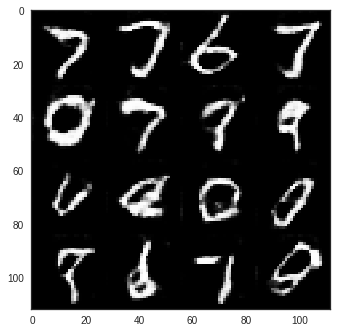

Epoch 1   Iteration 1810 Generator Loss: 0.904, Discriminator Loss: 1.105
Epoch 1   Iteration 1820 Generator Loss: 0.853, Discriminator Loss: 1.141
Epoch 1   Iteration 1830 Generator Loss: 0.848, Discriminator Loss: 1.111
Epoch 1   Iteration 1840 Generator Loss: 0.807, Discriminator Loss: 1.143
Epoch 1   Iteration 1850 Generator Loss: 0.884, Discriminator Loss: 1.093
Epoch 1   Iteration 1860 Generator Loss: 0.881, Discriminator Loss: 1.130
Epoch 1   Iteration 1870 Generator Loss: 0.795, Discriminator Loss: 1.251
Epoch 2   Iteration 1880 Generator Loss: 0.771, Discriminator Loss: 1.126
Epoch 2   Iteration 1890 Generator Loss: 0.779, Discriminator Loss: 1.182
Epoch 2   Iteration 1900 Generator Loss: 0.828, Discriminator Loss: 1.154


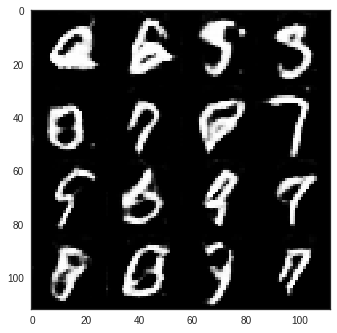

Epoch 2   Iteration 1910 Generator Loss: 0.830, Discriminator Loss: 1.178
Epoch 2   Iteration 1920 Generator Loss: 0.906, Discriminator Loss: 1.097
Epoch 2   Iteration 1930 Generator Loss: 0.925, Discriminator Loss: 1.116
Epoch 2   Iteration 1940 Generator Loss: 0.830, Discriminator Loss: 1.183
Epoch 2   Iteration 1950 Generator Loss: 0.805, Discriminator Loss: 1.160
Epoch 2   Iteration 1960 Generator Loss: 0.881, Discriminator Loss: 1.100
Epoch 2   Iteration 1970 Generator Loss: 0.787, Discriminator Loss: 1.148
Epoch 2   Iteration 1980 Generator Loss: 0.912, Discriminator Loss: 1.148
Epoch 2   Iteration 1990 Generator Loss: 0.997, Discriminator Loss: 1.204
Epoch 2   Iteration 2000 Generator Loss: 0.937, Discriminator Loss: 1.102


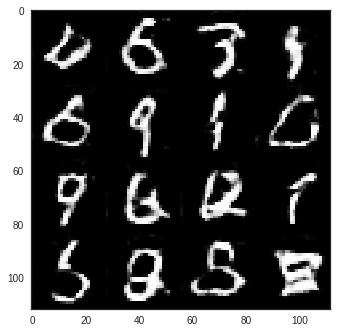

Epoch 2   Iteration 2010 Generator Loss: 0.847, Discriminator Loss: 1.128
Epoch 2   Iteration 2020 Generator Loss: 0.806, Discriminator Loss: 1.141
Epoch 2   Iteration 2030 Generator Loss: 0.709, Discriminator Loss: 1.176
Epoch 2   Iteration 2040 Generator Loss: 0.865, Discriminator Loss: 1.100
Epoch 2   Iteration 2050 Generator Loss: 0.829, Discriminator Loss: 1.146
Epoch 2   Iteration 2060 Generator Loss: 0.939, Discriminator Loss: 1.096
Epoch 2   Iteration 2070 Generator Loss: 0.827, Discriminator Loss: 1.183
Epoch 2   Iteration 2080 Generator Loss: 0.837, Discriminator Loss: 1.102
Epoch 2   Iteration 2090 Generator Loss: 0.839, Discriminator Loss: 1.096
Epoch 2   Iteration 2100 Generator Loss: 0.973, Discriminator Loss: 1.143


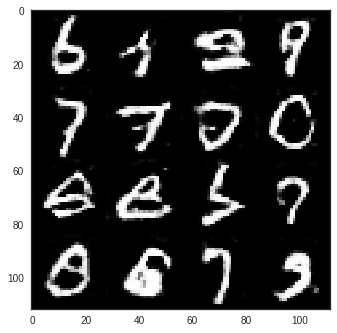

Epoch 2   Iteration 2110 Generator Loss: 0.995, Discriminator Loss: 1.139
Epoch 2   Iteration 2120 Generator Loss: 0.879, Discriminator Loss: 1.113
Epoch 2   Iteration 2130 Generator Loss: 0.862, Discriminator Loss: 1.222
Epoch 2   Iteration 2140 Generator Loss: 0.863, Discriminator Loss: 1.081
Epoch 2   Iteration 2150 Generator Loss: 0.849, Discriminator Loss: 1.141
Epoch 2   Iteration 2160 Generator Loss: 0.865, Discriminator Loss: 1.111
Epoch 2   Iteration 2170 Generator Loss: 0.947, Discriminator Loss: 1.199
Epoch 2   Iteration 2180 Generator Loss: 0.828, Discriminator Loss: 1.206
Epoch 2   Iteration 2190 Generator Loss: 0.851, Discriminator Loss: 1.180
Epoch 2   Iteration 2200 Generator Loss: 0.867, Discriminator Loss: 1.108


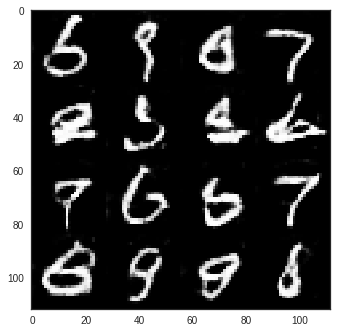

Epoch 2   Iteration 2210 Generator Loss: 0.804, Discriminator Loss: 1.132
Epoch 2   Iteration 2220 Generator Loss: 0.977, Discriminator Loss: 1.093
Epoch 2   Iteration 2230 Generator Loss: 0.884, Discriminator Loss: 1.099
Epoch 2   Iteration 2240 Generator Loss: 1.105, Discriminator Loss: 1.174
Epoch 2   Iteration 2250 Generator Loss: 0.864, Discriminator Loss: 1.096
Epoch 2   Iteration 2260 Generator Loss: 0.774, Discriminator Loss: 1.164
Epoch 2   Iteration 2270 Generator Loss: 0.883, Discriminator Loss: 1.104
Epoch 2   Iteration 2280 Generator Loss: 0.863, Discriminator Loss: 1.101
Epoch 2   Iteration 2290 Generator Loss: 0.865, Discriminator Loss: 1.171
Epoch 2   Iteration 2300 Generator Loss: 0.926, Discriminator Loss: 1.102


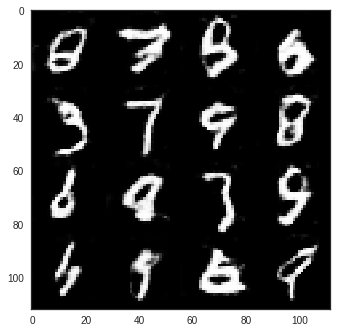

Epoch 2   Iteration 2310 Generator Loss: 1.129, Discriminator Loss: 1.280
Epoch 2   Iteration 2320 Generator Loss: 0.840, Discriminator Loss: 1.212
Epoch 2   Iteration 2330 Generator Loss: 0.775, Discriminator Loss: 1.146
Epoch 2   Iteration 2340 Generator Loss: 0.905, Discriminator Loss: 1.163
Epoch 2   Iteration 2350 Generator Loss: 0.843, Discriminator Loss: 1.157
Epoch 2   Iteration 2360 Generator Loss: 0.887, Discriminator Loss: 1.109
Epoch 2   Iteration 2370 Generator Loss: 0.897, Discriminator Loss: 1.139
Epoch 2   Iteration 2380 Generator Loss: 0.889, Discriminator Loss: 1.134
Epoch 2   Iteration 2390 Generator Loss: 0.817, Discriminator Loss: 1.130
Epoch 2   Iteration 2400 Generator Loss: 0.862, Discriminator Loss: 1.105


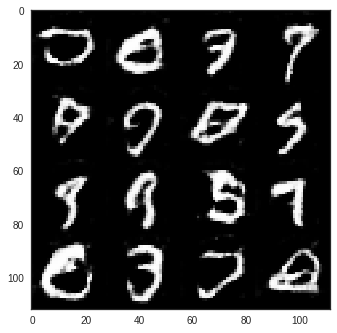

Epoch 2   Iteration 2410 Generator Loss: 0.936, Discriminator Loss: 1.154
Epoch 2   Iteration 2420 Generator Loss: 0.790, Discriminator Loss: 1.073
Epoch 2   Iteration 2430 Generator Loss: 1.052, Discriminator Loss: 1.122
Epoch 2   Iteration 2440 Generator Loss: 0.870, Discriminator Loss: 1.144
Epoch 2   Iteration 2450 Generator Loss: 0.865, Discriminator Loss: 1.203
Epoch 2   Iteration 2460 Generator Loss: 0.912, Discriminator Loss: 1.148
Epoch 2   Iteration 2470 Generator Loss: 0.888, Discriminator Loss: 1.127
Epoch 2   Iteration 2480 Generator Loss: 0.925, Discriminator Loss: 1.136
Epoch 2   Iteration 2490 Generator Loss: 0.900, Discriminator Loss: 1.162
Epoch 2   Iteration 2500 Generator Loss: 0.790, Discriminator Loss: 1.197


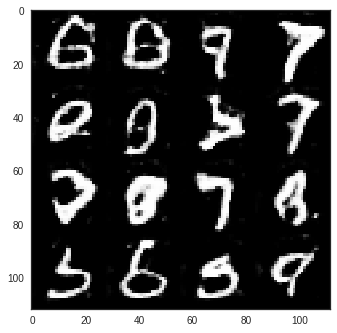

Epoch 2   Iteration 2510 Generator Loss: 0.926, Discriminator Loss: 1.160
Epoch 2   Iteration 2520 Generator Loss: 0.916, Discriminator Loss: 1.071
Epoch 2   Iteration 2530 Generator Loss: 0.869, Discriminator Loss: 1.180
Epoch 2   Iteration 2540 Generator Loss: 0.931, Discriminator Loss: 1.058
Epoch 2   Iteration 2550 Generator Loss: 0.972, Discriminator Loss: 1.127
Epoch 2   Iteration 2560 Generator Loss: 0.861, Discriminator Loss: 1.063
Epoch 2   Iteration 2570 Generator Loss: 0.867, Discriminator Loss: 1.065
Epoch 2   Iteration 2580 Generator Loss: 0.993, Discriminator Loss: 1.205
Epoch 2   Iteration 2590 Generator Loss: 0.860, Discriminator Loss: 1.077
Epoch 2   Iteration 2600 Generator Loss: 0.850, Discriminator Loss: 1.087


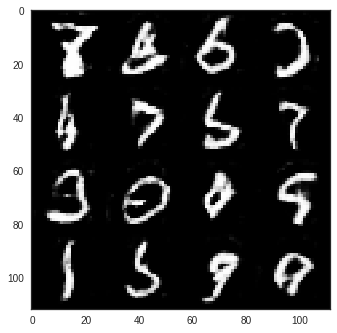

Epoch 2   Iteration 2610 Generator Loss: 0.832, Discriminator Loss: 1.211
Epoch 2   Iteration 2620 Generator Loss: 0.896, Discriminator Loss: 1.081
Epoch 2   Iteration 2630 Generator Loss: 0.787, Discriminator Loss: 1.232
Epoch 2   Iteration 2640 Generator Loss: 0.790, Discriminator Loss: 1.203
Epoch 2   Iteration 2650 Generator Loss: 0.872, Discriminator Loss: 1.107
Epoch 2   Iteration 2660 Generator Loss: 0.852, Discriminator Loss: 1.084
Epoch 2   Iteration 2670 Generator Loss: 0.856, Discriminator Loss: 1.071
Epoch 2   Iteration 2680 Generator Loss: 0.829, Discriminator Loss: 1.183
Epoch 2   Iteration 2690 Generator Loss: 0.889, Discriminator Loss: 1.141
Epoch 2   Iteration 2700 Generator Loss: 0.805, Discriminator Loss: 1.093


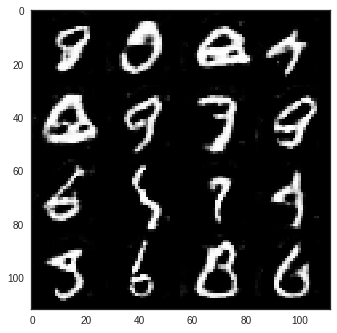

Epoch 2   Iteration 2710 Generator Loss: 0.921, Discriminator Loss: 1.076
Epoch 2   Iteration 2720 Generator Loss: 1.091, Discriminator Loss: 1.182
Epoch 2   Iteration 2730 Generator Loss: 0.924, Discriminator Loss: 1.137
Epoch 2   Iteration 2740 Generator Loss: 0.808, Discriminator Loss: 1.228
Epoch 2   Iteration 2750 Generator Loss: 0.867, Discriminator Loss: 1.081
Epoch 2   Iteration 2760 Generator Loss: 0.807, Discriminator Loss: 1.113
Epoch 2   Iteration 2770 Generator Loss: 0.950, Discriminator Loss: 1.061
Epoch 2   Iteration 2780 Generator Loss: 0.844, Discriminator Loss: 1.091
Epoch 2   Iteration 2790 Generator Loss: 0.888, Discriminator Loss: 1.060
Epoch 2   Iteration 2800 Generator Loss: 0.977, Discriminator Loss: 1.249


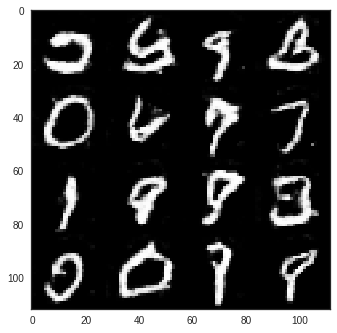

Epoch 2   Iteration 2810 Generator Loss: 0.946, Discriminator Loss: 1.110


In [96]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0   Iteration 10   Generator Loss: 2.773, Discriminator Loss: 0.169
Epoch 0   Iteration 20   Generator Loss: 2.364, Discriminator Loss: 0.161
Epoch 0   Iteration 30   Generator Loss: 10.957, Discriminator Loss: 0.155
Epoch 0   Iteration 40   Generator Loss: 0.444, Discriminator Loss: 1.223
Epoch 0   Iteration 50   Generator Loss: 8.927, Discriminator Loss: 0.006
Epoch 0   Iteration 60   Generator Loss: 11.294, Discriminator Loss: 0.802
Epoch 0   Iteration 70   Generator Loss: 4.552, Discriminator Loss: 0.172
Epoch 0   Iteration 80   Generator Loss: 2.984, Discriminator Loss: 0.082
Epoch 0   Iteration 90   Generator Loss: 2.478, Discriminator Loss: 0.184
Epoch 0   Iteration 100  Generator Loss: 9.664, Discriminator Loss: 0.042


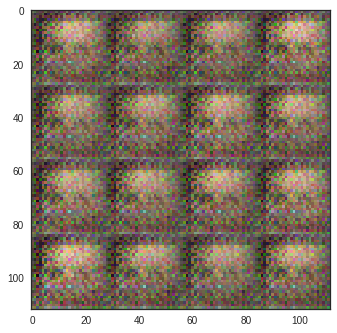

Epoch 0   Iteration 110  Generator Loss: 3.378, Discriminator Loss: 0.415
Epoch 0   Iteration 120  Generator Loss: 0.819, Discriminator Loss: 0.805
Epoch 0   Iteration 130  Generator Loss: 4.449, Discriminator Loss: 0.564
Epoch 0   Iteration 140  Generator Loss: 1.058, Discriminator Loss: 0.893
Epoch 0   Iteration 150  Generator Loss: 1.240, Discriminator Loss: 0.693
Epoch 0   Iteration 160  Generator Loss: 2.506, Discriminator Loss: 0.353
Epoch 0   Iteration 170  Generator Loss: 3.821, Discriminator Loss: 0.578
Epoch 0   Iteration 180  Generator Loss: 1.137, Discriminator Loss: 0.567
Epoch 0   Iteration 190  Generator Loss: 2.169, Discriminator Loss: 0.508
Epoch 0   Iteration 200  Generator Loss: 0.727, Discriminator Loss: 0.915


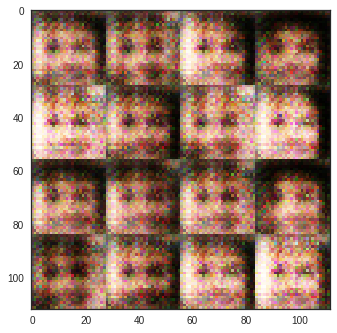

Epoch 0   Iteration 210  Generator Loss: 2.315, Discriminator Loss: 0.470
Epoch 0   Iteration 220  Generator Loss: 6.500, Discriminator Loss: 1.823
Epoch 0   Iteration 230  Generator Loss: 1.062, Discriminator Loss: 0.806
Epoch 0   Iteration 240  Generator Loss: 1.333, Discriminator Loss: 0.616
Epoch 0   Iteration 250  Generator Loss: 3.431, Discriminator Loss: 0.972
Epoch 0   Iteration 260  Generator Loss: 0.958, Discriminator Loss: 0.715
Epoch 0   Iteration 270  Generator Loss: 0.650, Discriminator Loss: 1.160
Epoch 0   Iteration 280  Generator Loss: 3.188, Discriminator Loss: 0.259
Epoch 0   Iteration 290  Generator Loss: 3.055, Discriminator Loss: 0.326
Epoch 0   Iteration 300  Generator Loss: 1.505, Discriminator Loss: 0.589


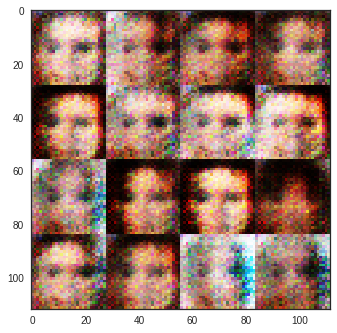

Epoch 0   Iteration 310  Generator Loss: 1.196, Discriminator Loss: 0.684
Epoch 0   Iteration 320  Generator Loss: 1.362, Discriminator Loss: 0.542
Epoch 0   Iteration 330  Generator Loss: 0.608, Discriminator Loss: 1.238
Epoch 0   Iteration 340  Generator Loss: 0.831, Discriminator Loss: 0.819
Epoch 0   Iteration 350  Generator Loss: 1.242, Discriminator Loss: 0.589
Epoch 0   Iteration 360  Generator Loss: 3.836, Discriminator Loss: 0.332
Epoch 0   Iteration 370  Generator Loss: 0.900, Discriminator Loss: 0.805
Epoch 0   Iteration 380  Generator Loss: 1.267, Discriminator Loss: 0.603
Epoch 0   Iteration 390  Generator Loss: 0.726, Discriminator Loss: 0.928
Epoch 0   Iteration 400  Generator Loss: 2.624, Discriminator Loss: 0.272


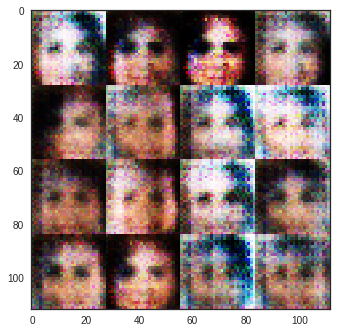

Epoch 0   Iteration 410  Generator Loss: 0.974, Discriminator Loss: 0.729
Epoch 0   Iteration 420  Generator Loss: 1.131, Discriminator Loss: 0.655
Epoch 0   Iteration 430  Generator Loss: 1.391, Discriminator Loss: 0.484
Epoch 0   Iteration 440  Generator Loss: 2.909, Discriminator Loss: 0.555
Epoch 0   Iteration 450  Generator Loss: 2.084, Discriminator Loss: 0.674
Epoch 0   Iteration 460  Generator Loss: 2.817, Discriminator Loss: 0.755
Epoch 0   Iteration 470  Generator Loss: 0.374, Discriminator Loss: 1.437
Epoch 0   Iteration 480  Generator Loss: 1.689, Discriminator Loss: 0.442
Epoch 0   Iteration 490  Generator Loss: 0.902, Discriminator Loss: 0.803
Epoch 0   Iteration 500  Generator Loss: 2.570, Discriminator Loss: 0.586


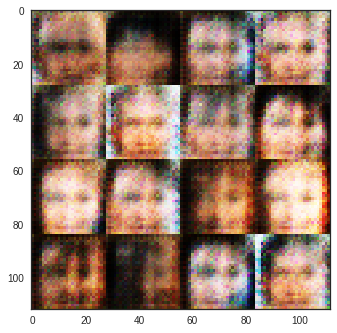

Epoch 0   Iteration 510  Generator Loss: 0.774, Discriminator Loss: 0.930
Epoch 0   Iteration 520  Generator Loss: 1.153, Discriminator Loss: 0.741
Epoch 0   Iteration 530  Generator Loss: 1.368, Discriminator Loss: 0.604
Epoch 0   Iteration 540  Generator Loss: 1.834, Discriminator Loss: 0.528
Epoch 0   Iteration 550  Generator Loss: 0.644, Discriminator Loss: 1.066
Epoch 0   Iteration 560  Generator Loss: 0.984, Discriminator Loss: 0.702
Epoch 0   Iteration 570  Generator Loss: 4.034, Discriminator Loss: 0.738
Epoch 0   Iteration 580  Generator Loss: 1.729, Discriminator Loss: 0.451
Epoch 0   Iteration 590  Generator Loss: 1.443, Discriminator Loss: 0.812
Epoch 0   Iteration 600  Generator Loss: 0.746, Discriminator Loss: 0.892


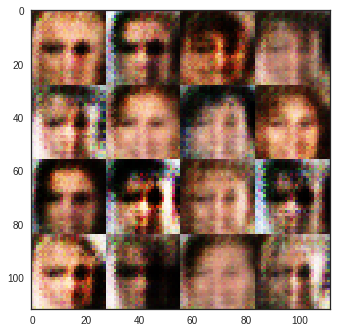

Epoch 0   Iteration 610  Generator Loss: 1.189, Discriminator Loss: 0.568
Epoch 0   Iteration 620  Generator Loss: 1.695, Discriminator Loss: 0.449
Epoch 0   Iteration 630  Generator Loss: 1.395, Discriminator Loss: 0.589
Epoch 0   Iteration 640  Generator Loss: 1.378, Discriminator Loss: 0.727
Epoch 0   Iteration 650  Generator Loss: 1.181, Discriminator Loss: 0.672
Epoch 0   Iteration 660  Generator Loss: 2.863, Discriminator Loss: 0.685
Epoch 0   Iteration 670  Generator Loss: 1.637, Discriminator Loss: 0.472
Epoch 0   Iteration 680  Generator Loss: 1.821, Discriminator Loss: 0.544
Epoch 0   Iteration 690  Generator Loss: 1.681, Discriminator Loss: 0.605
Epoch 0   Iteration 700  Generator Loss: 2.024, Discriminator Loss: 0.599


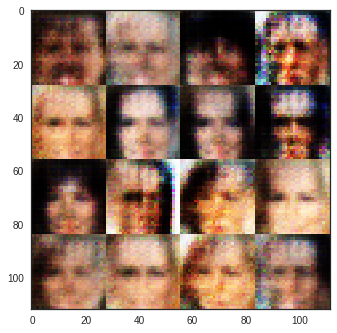

Epoch 0   Iteration 710  Generator Loss: 1.118, Discriminator Loss: 0.679
Epoch 0   Iteration 720  Generator Loss: 1.656, Discriminator Loss: 0.636
Epoch 0   Iteration 730  Generator Loss: 3.455, Discriminator Loss: 1.565
Epoch 0   Iteration 740  Generator Loss: 1.359, Discriminator Loss: 0.627
Epoch 0   Iteration 750  Generator Loss: 0.656, Discriminator Loss: 0.995
Epoch 0   Iteration 760  Generator Loss: 1.569, Discriminator Loss: 0.709
Epoch 0   Iteration 770  Generator Loss: 1.644, Discriminator Loss: 0.617
Epoch 0   Iteration 780  Generator Loss: 1.157, Discriminator Loss: 0.646
Epoch 0   Iteration 790  Generator Loss: 1.846, Discriminator Loss: 0.664
Epoch 0   Iteration 800  Generator Loss: 0.605, Discriminator Loss: 1.053


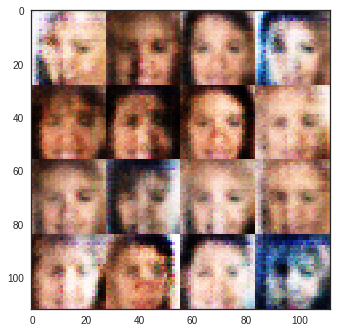

Epoch 0   Iteration 810  Generator Loss: 2.815, Discriminator Loss: 0.815
Epoch 0   Iteration 820  Generator Loss: 1.466, Discriminator Loss: 0.650
Epoch 0   Iteration 830  Generator Loss: 0.821, Discriminator Loss: 0.981
Epoch 0   Iteration 840  Generator Loss: 0.995, Discriminator Loss: 0.909
Epoch 0   Iteration 850  Generator Loss: 2.092, Discriminator Loss: 0.639
Epoch 0   Iteration 860  Generator Loss: 1.299, Discriminator Loss: 0.715
Epoch 0   Iteration 870  Generator Loss: 1.599, Discriminator Loss: 0.512
Epoch 0   Iteration 880  Generator Loss: 2.117, Discriminator Loss: 0.508
Epoch 0   Iteration 890  Generator Loss: 1.112, Discriminator Loss: 0.622
Epoch 0   Iteration 900  Generator Loss: 0.844, Discriminator Loss: 0.885


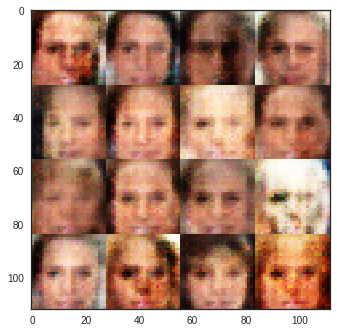

Epoch 0   Iteration 910  Generator Loss: 0.814, Discriminator Loss: 0.803
Epoch 0   Iteration 920  Generator Loss: 4.181, Discriminator Loss: 1.323
Epoch 0   Iteration 930  Generator Loss: 1.623, Discriminator Loss: 0.647
Epoch 0   Iteration 940  Generator Loss: 1.011, Discriminator Loss: 0.672
Epoch 0   Iteration 950  Generator Loss: 1.193, Discriminator Loss: 0.704
Epoch 0   Iteration 960  Generator Loss: 0.647, Discriminator Loss: 1.099
Epoch 0   Iteration 970  Generator Loss: 1.674, Discriminator Loss: 0.551
Epoch 0   Iteration 980  Generator Loss: 1.042, Discriminator Loss: 0.754
Epoch 0   Iteration 990  Generator Loss: 1.373, Discriminator Loss: 0.614
Epoch 0   Iteration 1000 Generator Loss: 1.327, Discriminator Loss: 0.618


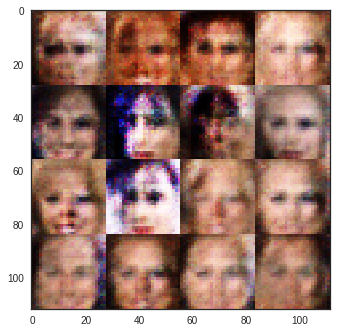

Epoch 0   Iteration 1010 Generator Loss: 2.132, Discriminator Loss: 0.606
Epoch 0   Iteration 1020 Generator Loss: 1.044, Discriminator Loss: 0.775
Epoch 0   Iteration 1030 Generator Loss: 1.217, Discriminator Loss: 0.603
Epoch 0   Iteration 1040 Generator Loss: 2.005, Discriminator Loss: 0.492
Epoch 0   Iteration 1050 Generator Loss: 4.070, Discriminator Loss: 0.646
Epoch 0   Iteration 1060 Generator Loss: 1.257, Discriminator Loss: 0.617
Epoch 0   Iteration 1070 Generator Loss: 1.520, Discriminator Loss: 0.473
Epoch 0   Iteration 1080 Generator Loss: 1.364, Discriminator Loss: 0.481
Epoch 0   Iteration 1090 Generator Loss: 1.100, Discriminator Loss: 0.625
Epoch 0   Iteration 1100 Generator Loss: 1.439, Discriminator Loss: 0.574


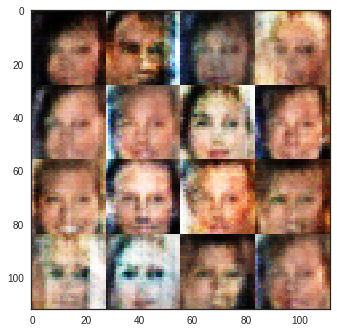

Epoch 0   Iteration 1110 Generator Loss: 1.371, Discriminator Loss: 0.514
Epoch 0   Iteration 1120 Generator Loss: 1.577, Discriminator Loss: 0.612
Epoch 0   Iteration 1130 Generator Loss: 4.261, Discriminator Loss: 1.647
Epoch 0   Iteration 1140 Generator Loss: 0.787, Discriminator Loss: 0.922
Epoch 0   Iteration 1150 Generator Loss: 1.296, Discriminator Loss: 0.669
Epoch 0   Iteration 1160 Generator Loss: 1.661, Discriminator Loss: 0.493
Epoch 0   Iteration 1170 Generator Loss: 1.390, Discriminator Loss: 0.692
Epoch 0   Iteration 1180 Generator Loss: 1.372, Discriminator Loss: 0.619
Epoch 0   Iteration 1190 Generator Loss: 1.464, Discriminator Loss: 0.509
Epoch 0   Iteration 1200 Generator Loss: 1.994, Discriminator Loss: 0.562


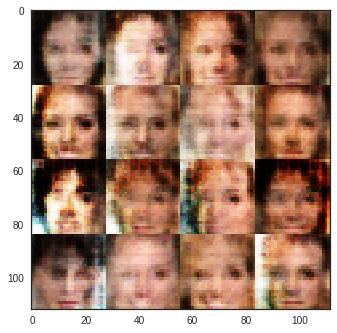

Epoch 0   Iteration 1210 Generator Loss: 1.214, Discriminator Loss: 0.675
Epoch 0   Iteration 1220 Generator Loss: 1.831, Discriminator Loss: 0.527
Epoch 0   Iteration 1230 Generator Loss: 1.191, Discriminator Loss: 0.729
Epoch 0   Iteration 1240 Generator Loss: 2.418, Discriminator Loss: 0.532
Epoch 0   Iteration 1250 Generator Loss: 2.158, Discriminator Loss: 0.709
Epoch 0   Iteration 1260 Generator Loss: 1.453, Discriminator Loss: 0.627
Epoch 0   Iteration 1270 Generator Loss: 0.843, Discriminator Loss: 0.810
Epoch 0   Iteration 1280 Generator Loss: 2.277, Discriminator Loss: 0.523
Epoch 0   Iteration 1290 Generator Loss: 2.132, Discriminator Loss: 0.709
Epoch 0   Iteration 1300 Generator Loss: 1.473, Discriminator Loss: 0.488


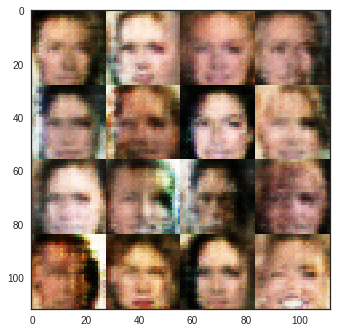

Epoch 0   Iteration 1310 Generator Loss: 1.479, Discriminator Loss: 0.530
Epoch 0   Iteration 1320 Generator Loss: 1.599, Discriminator Loss: 0.710
Epoch 0   Iteration 1330 Generator Loss: 1.116, Discriminator Loss: 0.746
Epoch 0   Iteration 1340 Generator Loss: 1.422, Discriminator Loss: 0.635
Epoch 0   Iteration 1350 Generator Loss: 1.324, Discriminator Loss: 0.560
Epoch 0   Iteration 1360 Generator Loss: 1.324, Discriminator Loss: 0.564
Epoch 0   Iteration 1370 Generator Loss: 2.024, Discriminator Loss: 0.821
Epoch 0   Iteration 1380 Generator Loss: 1.199, Discriminator Loss: 0.589
Epoch 0   Iteration 1390 Generator Loss: 1.394, Discriminator Loss: 0.629
Epoch 0   Iteration 1400 Generator Loss: 0.927, Discriminator Loss: 0.778


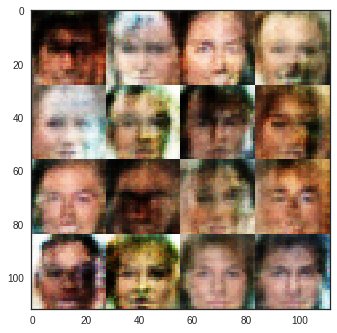

Epoch 0   Iteration 1410 Generator Loss: 1.387, Discriminator Loss: 0.529
Epoch 0   Iteration 1420 Generator Loss: 1.309, Discriminator Loss: 0.563
Epoch 0   Iteration 1430 Generator Loss: 1.869, Discriminator Loss: 0.501
Epoch 0   Iteration 1440 Generator Loss: 2.297, Discriminator Loss: 0.752
Epoch 0   Iteration 1450 Generator Loss: 1.362, Discriminator Loss: 0.571
Epoch 0   Iteration 1460 Generator Loss: 1.681, Discriminator Loss: 0.456
Epoch 0   Iteration 1470 Generator Loss: 1.210, Discriminator Loss: 0.684
Epoch 0   Iteration 1480 Generator Loss: 1.701, Discriminator Loss: 0.562
Epoch 0   Iteration 1490 Generator Loss: 1.218, Discriminator Loss: 0.744
Epoch 0   Iteration 1500 Generator Loss: 0.678, Discriminator Loss: 0.992


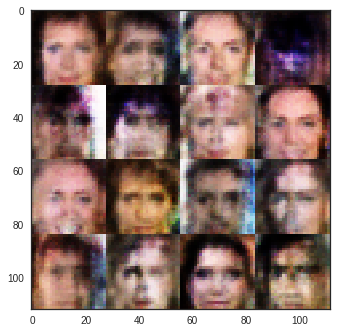

Epoch 0   Iteration 1510 Generator Loss: 0.778, Discriminator Loss: 0.883
Epoch 0   Iteration 1520 Generator Loss: 1.277, Discriminator Loss: 0.635
Epoch 0   Iteration 1530 Generator Loss: 1.068, Discriminator Loss: 0.703
Epoch 0   Iteration 1540 Generator Loss: 3.875, Discriminator Loss: 1.250
Epoch 0   Iteration 1550 Generator Loss: 1.057, Discriminator Loss: 0.691
Epoch 0   Iteration 1560 Generator Loss: 1.901, Discriminator Loss: 0.564
Epoch 0   Iteration 1570 Generator Loss: 0.795, Discriminator Loss: 0.889
Epoch 0   Iteration 1580 Generator Loss: 1.499, Discriminator Loss: 0.724
Epoch 0   Iteration 1590 Generator Loss: 1.407, Discriminator Loss: 0.697
Epoch 0   Iteration 1600 Generator Loss: 1.157, Discriminator Loss: 0.729


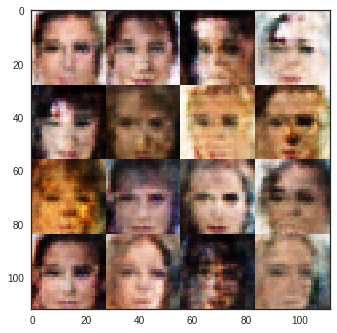

Epoch 0   Iteration 1610 Generator Loss: 1.747, Discriminator Loss: 0.519
Epoch 0   Iteration 1620 Generator Loss: 1.424, Discriminator Loss: 0.503
Epoch 0   Iteration 1630 Generator Loss: 0.904, Discriminator Loss: 0.801
Epoch 0   Iteration 1640 Generator Loss: 1.868, Discriminator Loss: 0.607
Epoch 0   Iteration 1650 Generator Loss: 2.389, Discriminator Loss: 0.716
Epoch 0   Iteration 1660 Generator Loss: 2.297, Discriminator Loss: 0.878
Epoch 0   Iteration 1670 Generator Loss: 1.204, Discriminator Loss: 0.614
Epoch 0   Iteration 1680 Generator Loss: 1.088, Discriminator Loss: 0.650
Epoch 0   Iteration 1690 Generator Loss: 1.166, Discriminator Loss: 0.697
Epoch 0   Iteration 1700 Generator Loss: 1.805, Discriminator Loss: 0.489


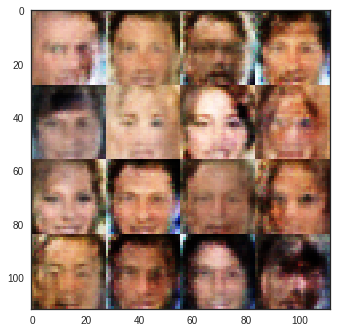

Epoch 0   Iteration 1710 Generator Loss: 0.512, Discriminator Loss: 1.196
Epoch 0   Iteration 1720 Generator Loss: 1.425, Discriminator Loss: 0.567
Epoch 0   Iteration 1730 Generator Loss: 1.390, Discriminator Loss: 0.601
Epoch 0   Iteration 1740 Generator Loss: 0.977, Discriminator Loss: 0.711
Epoch 0   Iteration 1750 Generator Loss: 1.579, Discriminator Loss: 0.589
Epoch 0   Iteration 1760 Generator Loss: 2.595, Discriminator Loss: 0.661
Epoch 0   Iteration 1770 Generator Loss: 0.526, Discriminator Loss: 1.212
Epoch 0   Iteration 1780 Generator Loss: 0.495, Discriminator Loss: 1.229
Epoch 0   Iteration 1790 Generator Loss: 0.936, Discriminator Loss: 0.913
Epoch 0   Iteration 1800 Generator Loss: 1.492, Discriminator Loss: 0.776


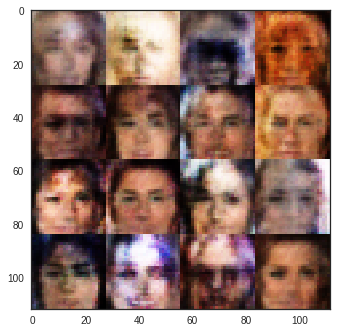

Epoch 0   Iteration 1810 Generator Loss: 1.295, Discriminator Loss: 0.567
Epoch 0   Iteration 1820 Generator Loss: 0.786, Discriminator Loss: 0.810
Epoch 0   Iteration 1830 Generator Loss: 1.355, Discriminator Loss: 0.617
Epoch 0   Iteration 1840 Generator Loss: 1.022, Discriminator Loss: 0.722
Epoch 0   Iteration 1850 Generator Loss: 1.069, Discriminator Loss: 0.685
Epoch 0   Iteration 1860 Generator Loss: 1.726, Discriminator Loss: 0.595
Epoch 0   Iteration 1870 Generator Loss: 2.104, Discriminator Loss: 0.540
Epoch 0   Iteration 1880 Generator Loss: 1.728, Discriminator Loss: 0.575
Epoch 0   Iteration 1890 Generator Loss: 1.354, Discriminator Loss: 0.557
Epoch 0   Iteration 1900 Generator Loss: 1.829, Discriminator Loss: 0.612


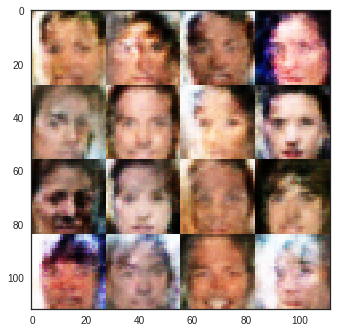

Epoch 0   Iteration 1910 Generator Loss: 1.053, Discriminator Loss: 0.767
Epoch 0   Iteration 1920 Generator Loss: 1.423, Discriminator Loss: 0.584
Epoch 0   Iteration 1930 Generator Loss: 1.504, Discriminator Loss: 0.627
Epoch 0   Iteration 1940 Generator Loss: 1.127, Discriminator Loss: 0.617
Epoch 0   Iteration 1950 Generator Loss: 2.423, Discriminator Loss: 0.579
Epoch 0   Iteration 1960 Generator Loss: 2.810, Discriminator Loss: 0.787
Epoch 0   Iteration 1970 Generator Loss: 1.312, Discriminator Loss: 0.576
Epoch 0   Iteration 1980 Generator Loss: 0.720, Discriminator Loss: 0.861
Epoch 0   Iteration 1990 Generator Loss: 0.884, Discriminator Loss: 0.751
Epoch 0   Iteration 2000 Generator Loss: 1.141, Discriminator Loss: 0.539


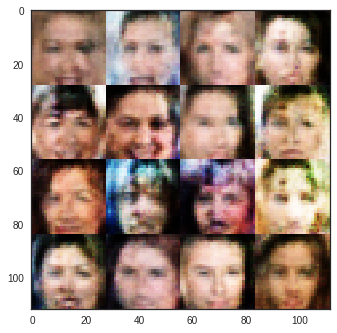

Epoch 0   Iteration 2010 Generator Loss: 0.822, Discriminator Loss: 0.827
Epoch 0   Iteration 2020 Generator Loss: 2.282, Discriminator Loss: 0.391
Epoch 0   Iteration 2030 Generator Loss: 1.882, Discriminator Loss: 0.405
Epoch 0   Iteration 2040 Generator Loss: 1.263, Discriminator Loss: 0.646
Epoch 0   Iteration 2050 Generator Loss: 0.998, Discriminator Loss: 0.740
Epoch 0   Iteration 2060 Generator Loss: 1.891, Discriminator Loss: 0.611
Epoch 0   Iteration 2070 Generator Loss: 2.453, Discriminator Loss: 0.725
Epoch 0   Iteration 2080 Generator Loss: 2.211, Discriminator Loss: 0.492
Epoch 0   Iteration 2090 Generator Loss: 0.927, Discriminator Loss: 0.752
Epoch 0   Iteration 2100 Generator Loss: 1.080, Discriminator Loss: 0.720


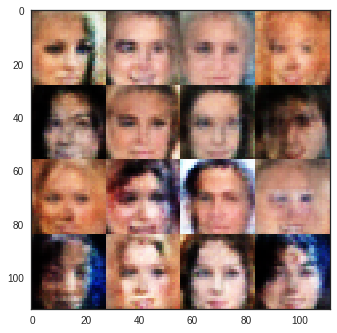

Epoch 0   Iteration 2110 Generator Loss: 1.219, Discriminator Loss: 0.694
Epoch 0   Iteration 2120 Generator Loss: 1.126, Discriminator Loss: 0.635
Epoch 0   Iteration 2130 Generator Loss: 1.157, Discriminator Loss: 0.671
Epoch 0   Iteration 2140 Generator Loss: 0.737, Discriminator Loss: 0.979
Epoch 0   Iteration 2150 Generator Loss: 1.173, Discriminator Loss: 0.666
Epoch 0   Iteration 2160 Generator Loss: 1.668, Discriminator Loss: 0.494
Epoch 0   Iteration 2170 Generator Loss: 2.126, Discriminator Loss: 0.514
Epoch 0   Iteration 2180 Generator Loss: 1.445, Discriminator Loss: 0.707
Epoch 0   Iteration 2190 Generator Loss: 1.231, Discriminator Loss: 0.555
Epoch 0   Iteration 2200 Generator Loss: 0.901, Discriminator Loss: 0.813


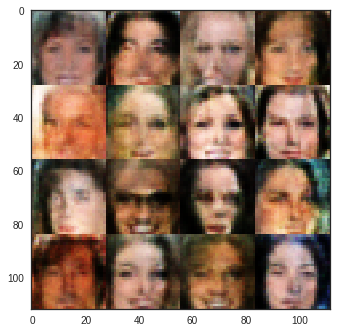

Epoch 0   Iteration 2210 Generator Loss: 1.049, Discriminator Loss: 0.705
Epoch 0   Iteration 2220 Generator Loss: 0.779, Discriminator Loss: 0.884
Epoch 0   Iteration 2230 Generator Loss: 1.394, Discriminator Loss: 0.656
Epoch 0   Iteration 2240 Generator Loss: 1.141, Discriminator Loss: 0.684
Epoch 0   Iteration 2250 Generator Loss: 0.857, Discriminator Loss: 0.825
Epoch 0   Iteration 2260 Generator Loss: 1.063, Discriminator Loss: 0.724
Epoch 0   Iteration 2270 Generator Loss: 1.279, Discriminator Loss: 0.654
Epoch 0   Iteration 2280 Generator Loss: 0.745, Discriminator Loss: 0.883
Epoch 0   Iteration 2290 Generator Loss: 3.177, Discriminator Loss: 0.736
Epoch 0   Iteration 2300 Generator Loss: 1.480, Discriminator Loss: 0.588


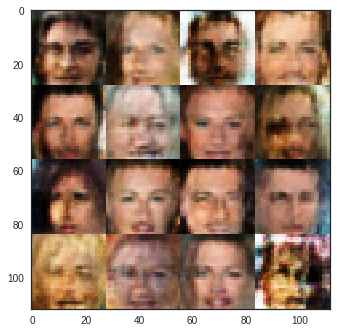

Epoch 0   Iteration 2310 Generator Loss: 1.073, Discriminator Loss: 0.742
Epoch 0   Iteration 2320 Generator Loss: 0.614, Discriminator Loss: 1.047
Epoch 0   Iteration 2330 Generator Loss: 1.465, Discriminator Loss: 0.583
Epoch 0   Iteration 2340 Generator Loss: 0.769, Discriminator Loss: 0.890
Epoch 0   Iteration 2350 Generator Loss: 0.687, Discriminator Loss: 1.065
Epoch 0   Iteration 2360 Generator Loss: 1.769, Discriminator Loss: 0.556
Epoch 0   Iteration 2370 Generator Loss: 1.036, Discriminator Loss: 0.736
Epoch 0   Iteration 2380 Generator Loss: 0.813, Discriminator Loss: 0.847
Epoch 0   Iteration 2390 Generator Loss: 1.348, Discriminator Loss: 0.751
Epoch 0   Iteration 2400 Generator Loss: 0.909, Discriminator Loss: 0.748


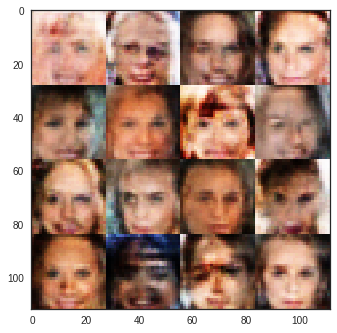

Epoch 0   Iteration 2410 Generator Loss: 1.840, Discriminator Loss: 0.387
Epoch 0   Iteration 2420 Generator Loss: 1.636, Discriminator Loss: 0.527
Epoch 0   Iteration 2430 Generator Loss: 1.318, Discriminator Loss: 0.640
Epoch 0   Iteration 2440 Generator Loss: 0.522, Discriminator Loss: 1.133
Epoch 0   Iteration 2450 Generator Loss: 0.900, Discriminator Loss: 0.841
Epoch 0   Iteration 2460 Generator Loss: 1.780, Discriminator Loss: 0.608
Epoch 0   Iteration 2470 Generator Loss: 2.952, Discriminator Loss: 0.646
Epoch 0   Iteration 2480 Generator Loss: 1.000, Discriminator Loss: 0.677
Epoch 0   Iteration 2490 Generator Loss: 1.609, Discriminator Loss: 0.462
Epoch 0   Iteration 2500 Generator Loss: 1.699, Discriminator Loss: 0.528


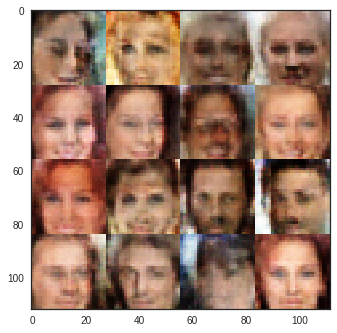

Epoch 0   Iteration 2510 Generator Loss: 3.700, Discriminator Loss: 0.800
Epoch 0   Iteration 2520 Generator Loss: 0.851, Discriminator Loss: 0.835
Epoch 0   Iteration 2530 Generator Loss: 1.213, Discriminator Loss: 0.630
Epoch 0   Iteration 2540 Generator Loss: 2.144, Discriminator Loss: 0.791
Epoch 0   Iteration 2550 Generator Loss: 1.156, Discriminator Loss: 0.728
Epoch 0   Iteration 2560 Generator Loss: 1.152, Discriminator Loss: 0.627
Epoch 0   Iteration 2570 Generator Loss: 1.994, Discriminator Loss: 0.709
Epoch 0   Iteration 2580 Generator Loss: 1.275, Discriminator Loss: 0.607
Epoch 0   Iteration 2590 Generator Loss: 1.354, Discriminator Loss: 0.549
Epoch 0   Iteration 2600 Generator Loss: 2.242, Discriminator Loss: 0.883


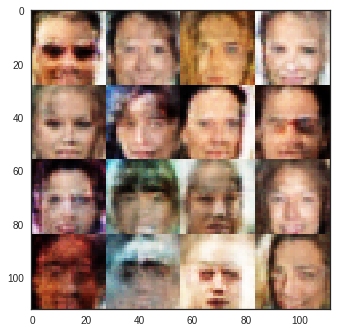

Epoch 0   Iteration 2610 Generator Loss: 0.930, Discriminator Loss: 0.788
Epoch 0   Iteration 2620 Generator Loss: 1.138, Discriminator Loss: 0.773
Epoch 0   Iteration 2630 Generator Loss: 0.892, Discriminator Loss: 0.793
Epoch 0   Iteration 2640 Generator Loss: 0.998, Discriminator Loss: 0.720
Epoch 0   Iteration 2650 Generator Loss: 1.383, Discriminator Loss: 0.621
Epoch 0   Iteration 2660 Generator Loss: 0.721, Discriminator Loss: 0.907
Epoch 0   Iteration 2670 Generator Loss: 2.504, Discriminator Loss: 0.537
Epoch 0   Iteration 2680 Generator Loss: 1.390, Discriminator Loss: 0.616
Epoch 0   Iteration 2690 Generator Loss: 1.259, Discriminator Loss: 0.618
Epoch 0   Iteration 2700 Generator Loss: 1.491, Discriminator Loss: 0.772


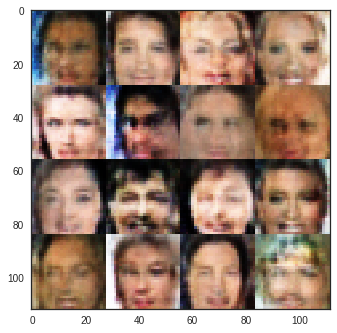

Epoch 0   Iteration 2710 Generator Loss: 0.717, Discriminator Loss: 0.897
Epoch 0   Iteration 2720 Generator Loss: 0.962, Discriminator Loss: 0.808
Epoch 0   Iteration 2730 Generator Loss: 0.484, Discriminator Loss: 1.191
Epoch 0   Iteration 2740 Generator Loss: 1.541, Discriminator Loss: 0.635
Epoch 0   Iteration 2750 Generator Loss: 2.036, Discriminator Loss: 0.526
Epoch 0   Iteration 2760 Generator Loss: 1.695, Discriminator Loss: 0.511
Epoch 0   Iteration 2770 Generator Loss: 1.228, Discriminator Loss: 0.607
Epoch 0   Iteration 2780 Generator Loss: 2.322, Discriminator Loss: 0.430
Epoch 0   Iteration 2790 Generator Loss: 0.857, Discriminator Loss: 0.808
Epoch 0   Iteration 2800 Generator Loss: 2.735, Discriminator Loss: 0.512


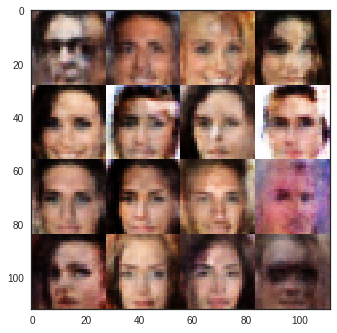

Epoch 0   Iteration 2810 Generator Loss: 1.378, Discriminator Loss: 0.569
Epoch 0   Iteration 2820 Generator Loss: 1.509, Discriminator Loss: 0.504
Epoch 0   Iteration 2830 Generator Loss: 1.598, Discriminator Loss: 0.480
Epoch 0   Iteration 2840 Generator Loss: 1.651, Discriminator Loss: 0.524
Epoch 0   Iteration 2850 Generator Loss: 1.281, Discriminator Loss: 0.678
Epoch 0   Iteration 2860 Generator Loss: 0.858, Discriminator Loss: 0.765
Epoch 0   Iteration 2870 Generator Loss: 2.292, Discriminator Loss: 0.625
Epoch 0   Iteration 2880 Generator Loss: 1.195, Discriminator Loss: 0.661
Epoch 0   Iteration 2890 Generator Loss: 1.446, Discriminator Loss: 0.595
Epoch 0   Iteration 2900 Generator Loss: 1.944, Discriminator Loss: 0.472


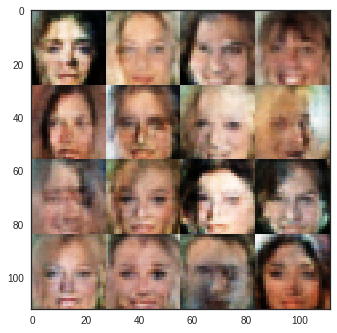

Epoch 0   Iteration 2910 Generator Loss: 1.410, Discriminator Loss: 0.614
Epoch 0   Iteration 2920 Generator Loss: 1.845, Discriminator Loss: 0.566
Epoch 0   Iteration 2930 Generator Loss: 1.535, Discriminator Loss: 0.588
Epoch 0   Iteration 2940 Generator Loss: 1.449, Discriminator Loss: 0.505
Epoch 0   Iteration 2950 Generator Loss: 1.933, Discriminator Loss: 0.641
Epoch 0   Iteration 2960 Generator Loss: 1.023, Discriminator Loss: 0.635
Epoch 0   Iteration 2970 Generator Loss: 0.913, Discriminator Loss: 0.818
Epoch 0   Iteration 2980 Generator Loss: 2.541, Discriminator Loss: 0.698
Epoch 0   Iteration 2990 Generator Loss: 1.498, Discriminator Loss: 0.539
Epoch 0   Iteration 3000 Generator Loss: 0.348, Discriminator Loss: 1.564


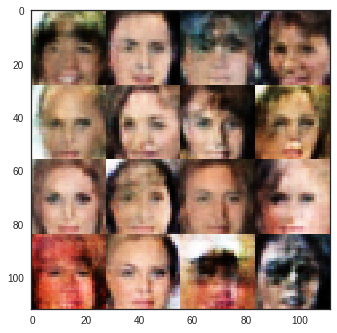

Epoch 0   Iteration 3010 Generator Loss: 0.415, Discriminator Loss: 1.353
Epoch 0   Iteration 3020 Generator Loss: 0.851, Discriminator Loss: 0.797
Epoch 0   Iteration 3030 Generator Loss: 1.832, Discriminator Loss: 0.498
Epoch 0   Iteration 3040 Generator Loss: 2.375, Discriminator Loss: 0.412
Epoch 0   Iteration 3050 Generator Loss: 1.035, Discriminator Loss: 0.741
Epoch 0   Iteration 3060 Generator Loss: 1.522, Discriminator Loss: 0.701
Epoch 0   Iteration 3070 Generator Loss: 2.123, Discriminator Loss: 0.560
Epoch 0   Iteration 3080 Generator Loss: 1.125, Discriminator Loss: 0.715
Epoch 0   Iteration 3090 Generator Loss: 1.448, Discriminator Loss: 0.619
Epoch 0   Iteration 3100 Generator Loss: 1.879, Discriminator Loss: 0.498


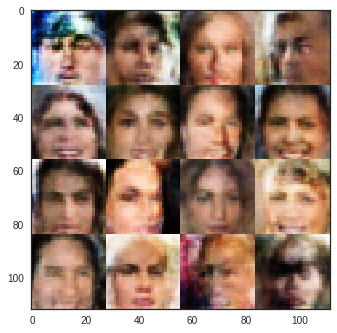

Epoch 0   Iteration 3110 Generator Loss: 0.485, Discriminator Loss: 1.182
Epoch 0   Iteration 3120 Generator Loss: 1.810, Discriminator Loss: 0.614
Epoch 0   Iteration 3130 Generator Loss: 1.818, Discriminator Loss: 0.549
Epoch 0   Iteration 3140 Generator Loss: 1.932, Discriminator Loss: 0.509
Epoch 0   Iteration 3150 Generator Loss: 0.902, Discriminator Loss: 0.803
Epoch 0   Iteration 3160 Generator Loss: 1.591, Discriminator Loss: 0.548
Epoch 1   Iteration 3170 Generator Loss: 0.660, Discriminator Loss: 0.963
Epoch 1   Iteration 3180 Generator Loss: 1.511, Discriminator Loss: 0.475
Epoch 1   Iteration 3190 Generator Loss: 1.505, Discriminator Loss: 0.556
Epoch 1   Iteration 3200 Generator Loss: 1.281, Discriminator Loss: 0.634


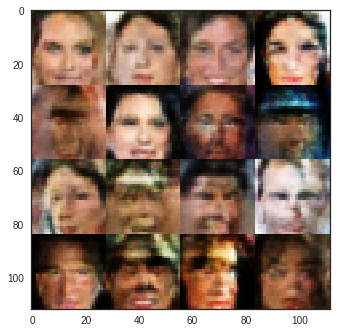

Epoch 1   Iteration 3210 Generator Loss: 1.332, Discriminator Loss: 0.538
Epoch 1   Iteration 3220 Generator Loss: 1.273, Discriminator Loss: 0.546
Epoch 1   Iteration 3230 Generator Loss: 0.423, Discriminator Loss: 1.332
Epoch 1   Iteration 3240 Generator Loss: 1.132, Discriminator Loss: 0.633
Epoch 1   Iteration 3250 Generator Loss: 1.633, Discriminator Loss: 0.534
Epoch 1   Iteration 3260 Generator Loss: 1.070, Discriminator Loss: 0.849
Epoch 1   Iteration 3270 Generator Loss: 1.806, Discriminator Loss: 0.544
Epoch 1   Iteration 3280 Generator Loss: 1.183, Discriminator Loss: 0.638
Epoch 1   Iteration 3290 Generator Loss: 1.178, Discriminator Loss: 0.624
Epoch 1   Iteration 3300 Generator Loss: 0.971, Discriminator Loss: 0.726


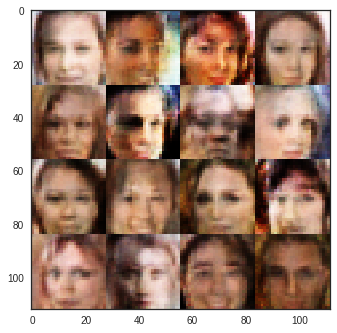

Epoch 1   Iteration 3310 Generator Loss: 1.354, Discriminator Loss: 0.591
Epoch 1   Iteration 3320 Generator Loss: 1.391, Discriminator Loss: 0.585
Epoch 1   Iteration 3330 Generator Loss: 1.760, Discriminator Loss: 0.642
Epoch 1   Iteration 3340 Generator Loss: 0.622, Discriminator Loss: 1.122
Epoch 1   Iteration 3350 Generator Loss: 1.474, Discriminator Loss: 0.534
Epoch 1   Iteration 3360 Generator Loss: 1.757, Discriminator Loss: 0.526
Epoch 1   Iteration 3370 Generator Loss: 0.694, Discriminator Loss: 0.931
Epoch 1   Iteration 3380 Generator Loss: 0.766, Discriminator Loss: 0.922
Epoch 1   Iteration 3390 Generator Loss: 0.845, Discriminator Loss: 0.826
Epoch 1   Iteration 3400 Generator Loss: 1.321, Discriminator Loss: 0.502


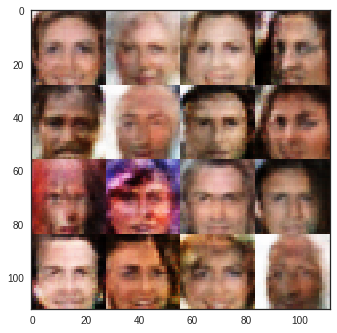

Epoch 1   Iteration 3410 Generator Loss: 1.988, Discriminator Loss: 0.447
Epoch 1   Iteration 3420 Generator Loss: 2.125, Discriminator Loss: 0.500
Epoch 1   Iteration 3430 Generator Loss: 0.966, Discriminator Loss: 0.801
Epoch 1   Iteration 3440 Generator Loss: 1.430, Discriminator Loss: 0.669
Epoch 1   Iteration 3450 Generator Loss: 0.845, Discriminator Loss: 0.815
Epoch 1   Iteration 3460 Generator Loss: 1.698, Discriminator Loss: 0.626
Epoch 1   Iteration 3470 Generator Loss: 0.790, Discriminator Loss: 0.945
Epoch 1   Iteration 3480 Generator Loss: 1.132, Discriminator Loss: 0.659
Epoch 1   Iteration 3490 Generator Loss: 2.198, Discriminator Loss: 0.400
Epoch 1   Iteration 3500 Generator Loss: 2.168, Discriminator Loss: 0.547


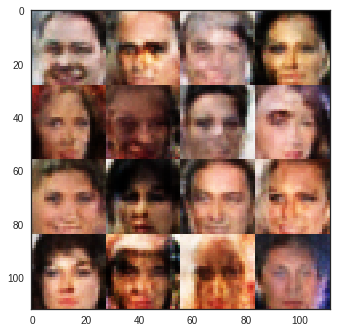

Epoch 1   Iteration 3510 Generator Loss: 1.320, Discriminator Loss: 0.578
Epoch 1   Iteration 3520 Generator Loss: 2.420, Discriminator Loss: 0.741
Epoch 1   Iteration 3530 Generator Loss: 1.203, Discriminator Loss: 0.614
Epoch 1   Iteration 3540 Generator Loss: 1.664, Discriminator Loss: 0.466
Epoch 1   Iteration 3550 Generator Loss: 0.807, Discriminator Loss: 0.813
Epoch 1   Iteration 3560 Generator Loss: 0.616, Discriminator Loss: 1.127
Epoch 1   Iteration 3570 Generator Loss: 1.137, Discriminator Loss: 0.603
Epoch 1   Iteration 3580 Generator Loss: 0.688, Discriminator Loss: 1.084
Epoch 1   Iteration 3590 Generator Loss: 1.202, Discriminator Loss: 0.611
Epoch 1   Iteration 3600 Generator Loss: 0.829, Discriminator Loss: 0.797


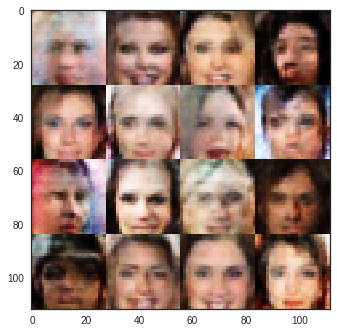

Epoch 1   Iteration 3610 Generator Loss: 2.023, Discriminator Loss: 0.510
Epoch 1   Iteration 3620 Generator Loss: 1.103, Discriminator Loss: 0.639
Epoch 1   Iteration 3630 Generator Loss: 1.414, Discriminator Loss: 0.640
Epoch 1   Iteration 3640 Generator Loss: 0.686, Discriminator Loss: 0.960
Epoch 1   Iteration 3650 Generator Loss: 1.390, Discriminator Loss: 0.452
Epoch 1   Iteration 3660 Generator Loss: 0.566, Discriminator Loss: 1.132
Epoch 1   Iteration 3670 Generator Loss: 2.736, Discriminator Loss: 0.816
Epoch 1   Iteration 3680 Generator Loss: 1.218, Discriminator Loss: 0.664
Epoch 1   Iteration 3690 Generator Loss: 1.177, Discriminator Loss: 0.635
Epoch 1   Iteration 3700 Generator Loss: 1.922, Discriminator Loss: 0.517


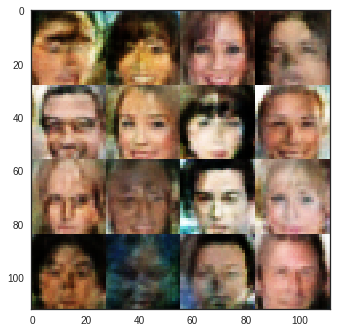

Epoch 1   Iteration 3710 Generator Loss: 0.698, Discriminator Loss: 0.956
Epoch 1   Iteration 3720 Generator Loss: 2.033, Discriminator Loss: 0.459
Epoch 1   Iteration 3730 Generator Loss: 0.573, Discriminator Loss: 1.050
Epoch 1   Iteration 3740 Generator Loss: 0.589, Discriminator Loss: 1.097
Epoch 1   Iteration 3750 Generator Loss: 1.742, Discriminator Loss: 0.521
Epoch 1   Iteration 3760 Generator Loss: 1.332, Discriminator Loss: 0.628
Epoch 1   Iteration 3770 Generator Loss: 0.901, Discriminator Loss: 0.822
Epoch 1   Iteration 3780 Generator Loss: 1.592, Discriminator Loss: 0.486
Epoch 1   Iteration 3790 Generator Loss: 1.595, Discriminator Loss: 0.586
Epoch 1   Iteration 3800 Generator Loss: 1.373, Discriminator Loss: 0.546


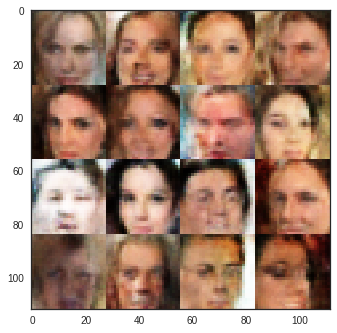

Epoch 1   Iteration 3810 Generator Loss: 0.779, Discriminator Loss: 0.934
Epoch 1   Iteration 3820 Generator Loss: 1.016, Discriminator Loss: 0.711
Epoch 1   Iteration 3830 Generator Loss: 0.898, Discriminator Loss: 0.798
Epoch 1   Iteration 3840 Generator Loss: 2.101, Discriminator Loss: 0.468
Epoch 1   Iteration 3850 Generator Loss: 1.807, Discriminator Loss: 0.577
Epoch 1   Iteration 3860 Generator Loss: 1.251, Discriminator Loss: 0.559
Epoch 1   Iteration 3870 Generator Loss: 0.949, Discriminator Loss: 0.708
Epoch 1   Iteration 3880 Generator Loss: 1.201, Discriminator Loss: 0.541
Epoch 1   Iteration 3890 Generator Loss: 1.781, Discriminator Loss: 0.482
Epoch 1   Iteration 3900 Generator Loss: 0.779, Discriminator Loss: 0.869


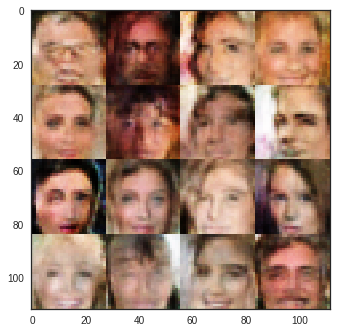

Epoch 1   Iteration 3910 Generator Loss: 0.799, Discriminator Loss: 0.811
Epoch 1   Iteration 3920 Generator Loss: 1.015, Discriminator Loss: 0.673
Epoch 1   Iteration 3930 Generator Loss: 1.059, Discriminator Loss: 0.727
Epoch 1   Iteration 3940 Generator Loss: 0.699, Discriminator Loss: 0.893
Epoch 1   Iteration 3950 Generator Loss: 1.174, Discriminator Loss: 0.675
Epoch 1   Iteration 3960 Generator Loss: 1.144, Discriminator Loss: 0.677
Epoch 1   Iteration 3970 Generator Loss: 1.395, Discriminator Loss: 0.540
Epoch 1   Iteration 3980 Generator Loss: 1.369, Discriminator Loss: 0.586
Epoch 1   Iteration 3990 Generator Loss: 1.575, Discriminator Loss: 0.371
Epoch 1   Iteration 4000 Generator Loss: 0.504, Discriminator Loss: 1.158


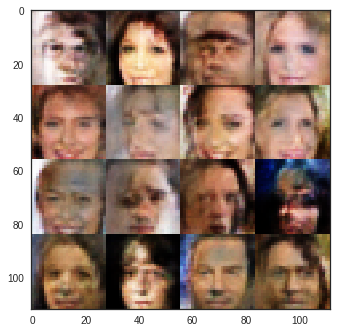

Epoch 1   Iteration 4010 Generator Loss: 1.732, Discriminator Loss: 0.519
Epoch 1   Iteration 4020 Generator Loss: 1.121, Discriminator Loss: 0.676
Epoch 1   Iteration 4030 Generator Loss: 1.637, Discriminator Loss: 0.445
Epoch 1   Iteration 4040 Generator Loss: 1.466, Discriminator Loss: 0.559
Epoch 1   Iteration 4050 Generator Loss: 0.569, Discriminator Loss: 1.146
Epoch 1   Iteration 4060 Generator Loss: 1.823, Discriminator Loss: 0.497
Epoch 1   Iteration 4070 Generator Loss: 1.307, Discriminator Loss: 0.498
Epoch 1   Iteration 4080 Generator Loss: 1.801, Discriminator Loss: 0.559
Epoch 1   Iteration 4090 Generator Loss: 1.677, Discriminator Loss: 0.478
Epoch 1   Iteration 4100 Generator Loss: 1.767, Discriminator Loss: 0.592


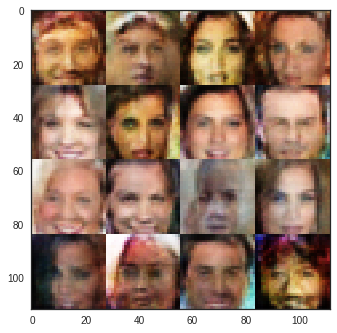

Epoch 1   Iteration 4110 Generator Loss: 1.875, Discriminator Loss: 0.595
Epoch 1   Iteration 4120 Generator Loss: 1.172, Discriminator Loss: 0.610
Epoch 1   Iteration 4130 Generator Loss: 0.970, Discriminator Loss: 0.672
Epoch 1   Iteration 4140 Generator Loss: 1.117, Discriminator Loss: 0.641
Epoch 1   Iteration 4150 Generator Loss: 0.396, Discriminator Loss: 1.381
Epoch 1   Iteration 4160 Generator Loss: 1.276, Discriminator Loss: 0.558
Epoch 1   Iteration 4170 Generator Loss: 0.631, Discriminator Loss: 0.965
Epoch 1   Iteration 4180 Generator Loss: 2.634, Discriminator Loss: 0.664
Epoch 1   Iteration 4190 Generator Loss: 1.390, Discriminator Loss: 0.611
Epoch 1   Iteration 4200 Generator Loss: 1.267, Discriminator Loss: 0.533


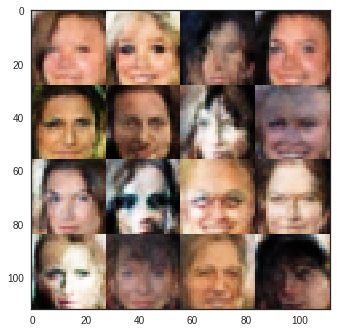

Epoch 1   Iteration 4210 Generator Loss: 0.932, Discriminator Loss: 0.732
Epoch 1   Iteration 4220 Generator Loss: 0.989, Discriminator Loss: 0.653
Epoch 1   Iteration 4230 Generator Loss: 2.093, Discriminator Loss: 0.506
Epoch 1   Iteration 4240 Generator Loss: 0.855, Discriminator Loss: 0.823
Epoch 1   Iteration 4250 Generator Loss: 2.738, Discriminator Loss: 0.630
Epoch 1   Iteration 4260 Generator Loss: 2.044, Discriminator Loss: 0.504
Epoch 1   Iteration 4270 Generator Loss: 1.735, Discriminator Loss: 0.669
Epoch 1   Iteration 4280 Generator Loss: 1.801, Discriminator Loss: 0.908
Epoch 1   Iteration 4290 Generator Loss: 2.834, Discriminator Loss: 0.784
Epoch 1   Iteration 4300 Generator Loss: 1.598, Discriminator Loss: 0.500


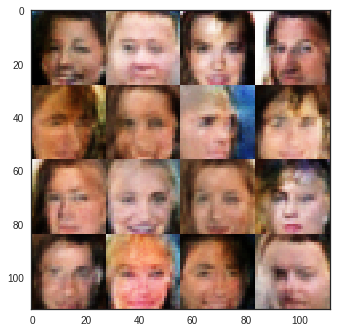

Epoch 1   Iteration 4310 Generator Loss: 1.236, Discriminator Loss: 0.568
Epoch 1   Iteration 4320 Generator Loss: 1.374, Discriminator Loss: 0.602
Epoch 1   Iteration 4330 Generator Loss: 2.117, Discriminator Loss: 0.628
Epoch 1   Iteration 4340 Generator Loss: 1.349, Discriminator Loss: 0.496
Epoch 1   Iteration 4350 Generator Loss: 1.439, Discriminator Loss: 0.505
Epoch 1   Iteration 4360 Generator Loss: 1.199, Discriminator Loss: 0.597
Epoch 1   Iteration 4370 Generator Loss: 2.184, Discriminator Loss: 0.393
Epoch 1   Iteration 4380 Generator Loss: 0.924, Discriminator Loss: 0.743
Epoch 1   Iteration 4390 Generator Loss: 0.862, Discriminator Loss: 0.787
Epoch 1   Iteration 4400 Generator Loss: 1.860, Discriminator Loss: 0.382


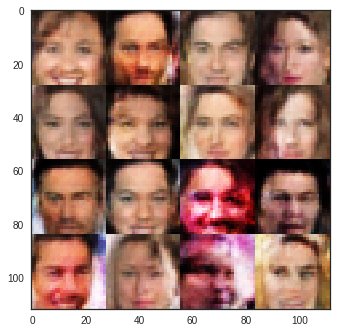

Epoch 1   Iteration 4410 Generator Loss: 1.202, Discriminator Loss: 0.588
Epoch 1   Iteration 4420 Generator Loss: 1.685, Discriminator Loss: 0.529
Epoch 1   Iteration 4430 Generator Loss: 1.442, Discriminator Loss: 0.513
Epoch 1   Iteration 4440 Generator Loss: 1.822, Discriminator Loss: 0.549
Epoch 1   Iteration 4450 Generator Loss: 1.586, Discriminator Loss: 0.611
Epoch 1   Iteration 4460 Generator Loss: 0.615, Discriminator Loss: 0.977
Epoch 1   Iteration 4470 Generator Loss: 1.177, Discriminator Loss: 0.586
Epoch 1   Iteration 4480 Generator Loss: 1.035, Discriminator Loss: 0.719
Epoch 1   Iteration 4490 Generator Loss: 2.597, Discriminator Loss: 0.465
Epoch 1   Iteration 4500 Generator Loss: 1.844, Discriminator Loss: 0.448


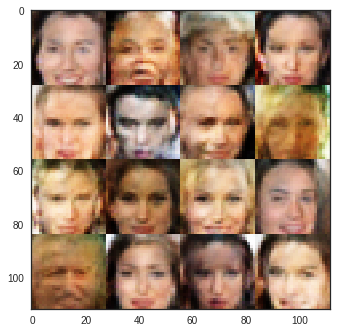

Epoch 1   Iteration 4510 Generator Loss: 3.346, Discriminator Loss: 0.658
Epoch 1   Iteration 4520 Generator Loss: 1.059, Discriminator Loss: 0.643
Epoch 1   Iteration 4530 Generator Loss: 2.016, Discriminator Loss: 0.436
Epoch 1   Iteration 4540 Generator Loss: 1.123, Discriminator Loss: 0.633
Epoch 1   Iteration 4550 Generator Loss: 0.592, Discriminator Loss: 1.077
Epoch 1   Iteration 4560 Generator Loss: 0.618, Discriminator Loss: 0.993
Epoch 1   Iteration 4570 Generator Loss: 1.594, Discriminator Loss: 0.455
Epoch 1   Iteration 4580 Generator Loss: 0.392, Discriminator Loss: 1.347
Epoch 1   Iteration 4590 Generator Loss: 1.136, Discriminator Loss: 0.594
Epoch 1   Iteration 4600 Generator Loss: 1.130, Discriminator Loss: 0.607


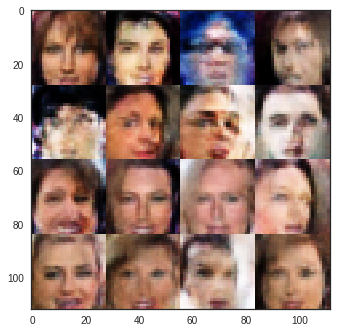

Epoch 1   Iteration 4610 Generator Loss: 1.561, Discriminator Loss: 0.480
Epoch 1   Iteration 4620 Generator Loss: 1.595, Discriminator Loss: 0.435
Epoch 1   Iteration 4630 Generator Loss: 2.080, Discriminator Loss: 0.510
Epoch 1   Iteration 4640 Generator Loss: 1.458, Discriminator Loss: 0.557
Epoch 1   Iteration 4650 Generator Loss: 2.019, Discriminator Loss: 0.387
Epoch 1   Iteration 4660 Generator Loss: 1.563, Discriminator Loss: 0.489
Epoch 1   Iteration 4670 Generator Loss: 1.347, Discriminator Loss: 0.519
Epoch 1   Iteration 4680 Generator Loss: 0.737, Discriminator Loss: 0.862
Epoch 1   Iteration 4690 Generator Loss: 1.149, Discriminator Loss: 0.605
Epoch 1   Iteration 4700 Generator Loss: 0.905, Discriminator Loss: 0.742


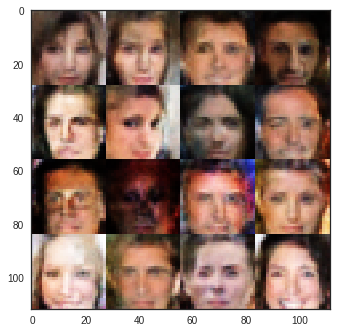

Epoch 1   Iteration 4710 Generator Loss: 2.090, Discriminator Loss: 0.464
Epoch 1   Iteration 4720 Generator Loss: 1.054, Discriminator Loss: 0.704
Epoch 1   Iteration 4730 Generator Loss: 1.953, Discriminator Loss: 0.969
Epoch 1   Iteration 4740 Generator Loss: 4.533, Discriminator Loss: 0.970
Epoch 1   Iteration 4750 Generator Loss: 1.699, Discriminator Loss: 0.480
Epoch 1   Iteration 4760 Generator Loss: 0.890, Discriminator Loss: 0.732
Epoch 1   Iteration 4770 Generator Loss: 1.757, Discriminator Loss: 0.409
Epoch 1   Iteration 4780 Generator Loss: 1.435, Discriminator Loss: 0.487
Epoch 1   Iteration 4790 Generator Loss: 0.839, Discriminator Loss: 0.794
Epoch 1   Iteration 4800 Generator Loss: 2.083, Discriminator Loss: 0.593


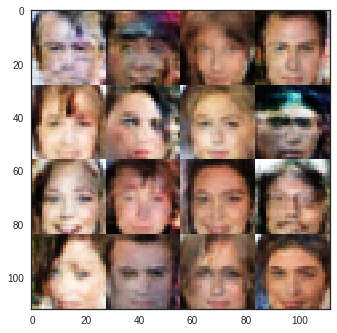

Epoch 1   Iteration 4810 Generator Loss: 1.701, Discriminator Loss: 0.411
Epoch 1   Iteration 4820 Generator Loss: 1.906, Discriminator Loss: 0.371
Epoch 1   Iteration 4830 Generator Loss: 1.324, Discriminator Loss: 0.539
Epoch 1   Iteration 4840 Generator Loss: 1.111, Discriminator Loss: 0.669
Epoch 1   Iteration 4850 Generator Loss: 1.594, Discriminator Loss: 0.446
Epoch 1   Iteration 4860 Generator Loss: 0.513, Discriminator Loss: 1.149
Epoch 1   Iteration 4870 Generator Loss: 1.099, Discriminator Loss: 0.672
Epoch 1   Iteration 4880 Generator Loss: 1.457, Discriminator Loss: 0.531
Epoch 1   Iteration 4890 Generator Loss: 1.156, Discriminator Loss: 0.787
Epoch 1   Iteration 4900 Generator Loss: 1.186, Discriminator Loss: 0.588


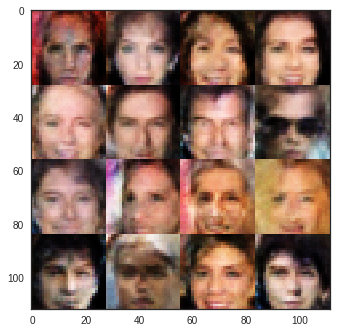

Epoch 1   Iteration 4910 Generator Loss: 0.796, Discriminator Loss: 0.810
Epoch 1   Iteration 4920 Generator Loss: 0.232, Discriminator Loss: 1.867
Epoch 1   Iteration 4930 Generator Loss: 1.610, Discriminator Loss: 0.622
Epoch 1   Iteration 4940 Generator Loss: 2.078, Discriminator Loss: 0.428
Epoch 1   Iteration 4950 Generator Loss: 0.949, Discriminator Loss: 0.732
Epoch 1   Iteration 4960 Generator Loss: 1.879, Discriminator Loss: 0.541
Epoch 1   Iteration 4970 Generator Loss: 1.032, Discriminator Loss: 0.681
Epoch 1   Iteration 4980 Generator Loss: 2.181, Discriminator Loss: 0.443
Epoch 1   Iteration 4990 Generator Loss: 1.479, Discriminator Loss: 0.519
Epoch 1   Iteration 5000 Generator Loss: 0.924, Discriminator Loss: 0.754


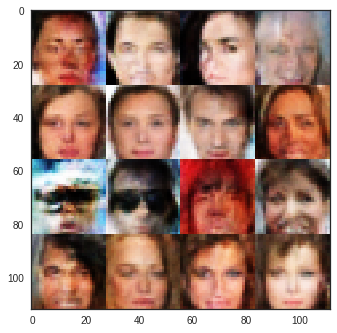

Epoch 1   Iteration 5010 Generator Loss: 1.881, Discriminator Loss: 0.490
Epoch 1   Iteration 5020 Generator Loss: 1.394, Discriminator Loss: 0.583
Epoch 1   Iteration 5030 Generator Loss: 0.821, Discriminator Loss: 0.821
Epoch 1   Iteration 5040 Generator Loss: 1.144, Discriminator Loss: 0.636
Epoch 1   Iteration 5050 Generator Loss: 0.882, Discriminator Loss: 0.799
Epoch 1   Iteration 5060 Generator Loss: 1.512, Discriminator Loss: 0.450
Epoch 1   Iteration 5070 Generator Loss: 1.257, Discriminator Loss: 0.583
Epoch 1   Iteration 5080 Generator Loss: 1.689, Discriminator Loss: 0.446
Epoch 1   Iteration 5090 Generator Loss: 2.529, Discriminator Loss: 0.449
Epoch 1   Iteration 5100 Generator Loss: 1.814, Discriminator Loss: 0.440


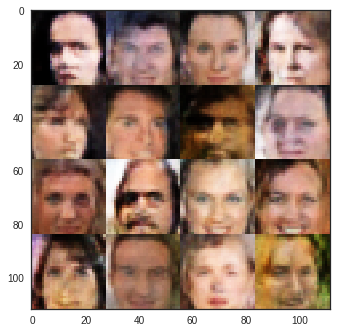

Epoch 1   Iteration 5110 Generator Loss: 1.641, Discriminator Loss: 0.429
Epoch 1   Iteration 5120 Generator Loss: 2.293, Discriminator Loss: 0.575
Epoch 1   Iteration 5130 Generator Loss: 0.931, Discriminator Loss: 0.700
Epoch 1   Iteration 5140 Generator Loss: 1.850, Discriminator Loss: 0.433
Epoch 1   Iteration 5150 Generator Loss: 1.920, Discriminator Loss: 0.370
Epoch 1   Iteration 5160 Generator Loss: 1.667, Discriminator Loss: 0.519
Epoch 1   Iteration 5170 Generator Loss: 2.768, Discriminator Loss: 0.364
Epoch 1   Iteration 5180 Generator Loss: 1.282, Discriminator Loss: 0.513
Epoch 1   Iteration 5190 Generator Loss: 1.309, Discriminator Loss: 0.506
Epoch 1   Iteration 5200 Generator Loss: 1.010, Discriminator Loss: 0.700


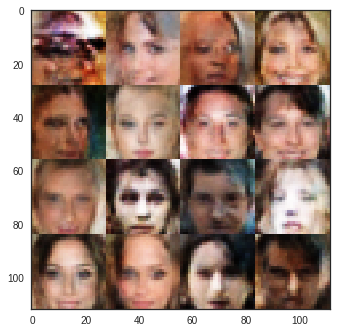

Epoch 1   Iteration 5210 Generator Loss: 0.458, Discriminator Loss: 1.249
Epoch 1   Iteration 5220 Generator Loss: 2.108, Discriminator Loss: 0.424
Epoch 1   Iteration 5230 Generator Loss: 1.955, Discriminator Loss: 0.312
Epoch 1   Iteration 5240 Generator Loss: 1.722, Discriminator Loss: 0.456
Epoch 1   Iteration 5250 Generator Loss: 1.174, Discriminator Loss: 0.721
Epoch 1   Iteration 5260 Generator Loss: 2.584, Discriminator Loss: 0.470
Epoch 1   Iteration 5270 Generator Loss: 1.541, Discriminator Loss: 0.478
Epoch 1   Iteration 5280 Generator Loss: 1.563, Discriminator Loss: 0.499
Epoch 1   Iteration 5290 Generator Loss: 2.214, Discriminator Loss: 0.532
Epoch 1   Iteration 5300 Generator Loss: 3.046, Discriminator Loss: 0.634


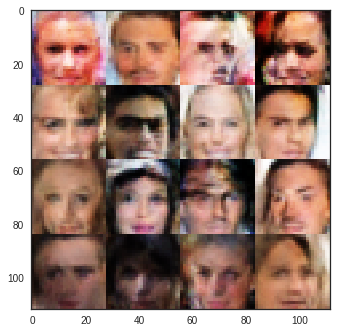

Epoch 1   Iteration 5310 Generator Loss: 0.746, Discriminator Loss: 0.881
Epoch 1   Iteration 5320 Generator Loss: 0.616, Discriminator Loss: 0.962
Epoch 1   Iteration 5330 Generator Loss: 0.656, Discriminator Loss: 1.015
Epoch 1   Iteration 5340 Generator Loss: 1.301, Discriminator Loss: 0.532
Epoch 1   Iteration 5350 Generator Loss: 0.822, Discriminator Loss: 0.806
Epoch 1   Iteration 5360 Generator Loss: 2.123, Discriminator Loss: 0.354
Epoch 1   Iteration 5370 Generator Loss: 0.503, Discriminator Loss: 1.201
Epoch 1   Iteration 5380 Generator Loss: 1.448, Discriminator Loss: 0.433
Epoch 1   Iteration 5390 Generator Loss: 0.387, Discriminator Loss: 1.310
Epoch 1   Iteration 5400 Generator Loss: 1.161, Discriminator Loss: 0.617


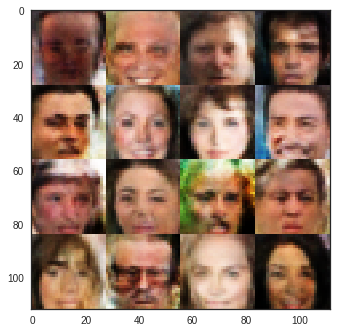

Epoch 1   Iteration 5410 Generator Loss: 1.124, Discriminator Loss: 0.657
Epoch 1   Iteration 5420 Generator Loss: 0.780, Discriminator Loss: 0.824
Epoch 1   Iteration 5430 Generator Loss: 1.677, Discriminator Loss: 0.454
Epoch 1   Iteration 5440 Generator Loss: 0.692, Discriminator Loss: 0.917
Epoch 1   Iteration 5450 Generator Loss: 1.458, Discriminator Loss: 0.557
Epoch 1   Iteration 5460 Generator Loss: 1.450, Discriminator Loss: 0.466
Epoch 1   Iteration 5470 Generator Loss: 0.338, Discriminator Loss: 1.614
Epoch 1   Iteration 5480 Generator Loss: 1.053, Discriminator Loss: 0.672
Epoch 1   Iteration 5490 Generator Loss: 1.273, Discriminator Loss: 0.572
Epoch 1   Iteration 5500 Generator Loss: 1.241, Discriminator Loss: 0.539


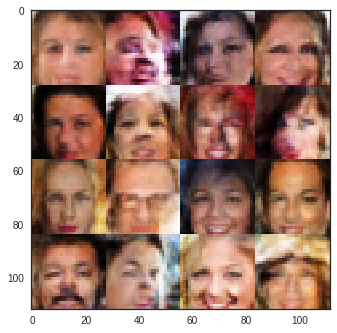

Epoch 1   Iteration 5510 Generator Loss: 0.872, Discriminator Loss: 0.846
Epoch 1   Iteration 5520 Generator Loss: 1.290, Discriminator Loss: 0.525
Epoch 1   Iteration 5530 Generator Loss: 1.148, Discriminator Loss: 0.562
Epoch 1   Iteration 5540 Generator Loss: 1.101, Discriminator Loss: 0.626
Epoch 1   Iteration 5550 Generator Loss: 0.687, Discriminator Loss: 0.922
Epoch 1   Iteration 5560 Generator Loss: 0.773, Discriminator Loss: 0.805
Epoch 1   Iteration 5570 Generator Loss: 1.711, Discriminator Loss: 0.455
Epoch 1   Iteration 5580 Generator Loss: 1.495, Discriminator Loss: 0.443
Epoch 1   Iteration 5590 Generator Loss: 1.454, Discriminator Loss: 0.473
Epoch 1   Iteration 5600 Generator Loss: 2.108, Discriminator Loss: 0.415


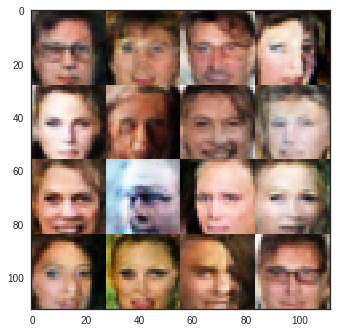

Epoch 1   Iteration 5610 Generator Loss: 0.597, Discriminator Loss: 1.114
Epoch 1   Iteration 5620 Generator Loss: 1.042, Discriminator Loss: 0.669
Epoch 1   Iteration 5630 Generator Loss: 1.342, Discriminator Loss: 0.616
Epoch 1   Iteration 5640 Generator Loss: 1.591, Discriminator Loss: 0.501
Epoch 1   Iteration 5650 Generator Loss: 2.016, Discriminator Loss: 0.306
Epoch 1   Iteration 5660 Generator Loss: 1.933, Discriminator Loss: 0.391
Epoch 1   Iteration 5670 Generator Loss: 1.289, Discriminator Loss: 0.577
Epoch 1   Iteration 5680 Generator Loss: 1.381, Discriminator Loss: 0.488
Epoch 1   Iteration 5690 Generator Loss: 1.680, Discriminator Loss: 0.426
Epoch 1   Iteration 5700 Generator Loss: 1.473, Discriminator Loss: 0.400


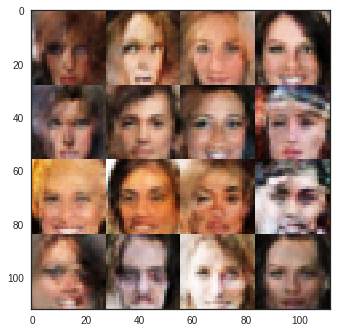

Epoch 1   Iteration 5710 Generator Loss: 1.086, Discriminator Loss: 0.663
Epoch 1   Iteration 5720 Generator Loss: 0.800, Discriminator Loss: 0.906
Epoch 1   Iteration 5730 Generator Loss: 2.197, Discriminator Loss: 0.518
Epoch 1   Iteration 5740 Generator Loss: 2.819, Discriminator Loss: 0.537
Epoch 1   Iteration 5750 Generator Loss: 1.547, Discriminator Loss: 0.437
Epoch 1   Iteration 5760 Generator Loss: 1.349, Discriminator Loss: 0.510
Epoch 1   Iteration 5770 Generator Loss: 2.126, Discriminator Loss: 0.366
Epoch 1   Iteration 5780 Generator Loss: 1.192, Discriminator Loss: 0.535
Epoch 1   Iteration 5790 Generator Loss: 1.527, Discriminator Loss: 0.444
Epoch 1   Iteration 5800 Generator Loss: 2.556, Discriminator Loss: 0.563


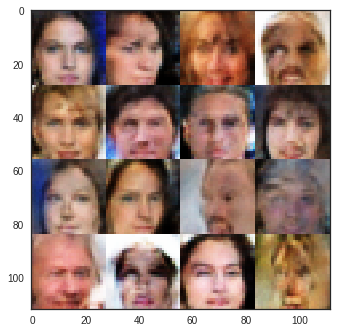

Epoch 1   Iteration 5810 Generator Loss: 3.494, Discriminator Loss: 0.527
Epoch 1   Iteration 5820 Generator Loss: 1.086, Discriminator Loss: 0.607
Epoch 1   Iteration 5830 Generator Loss: 0.748, Discriminator Loss: 0.937
Epoch 1   Iteration 5840 Generator Loss: 1.671, Discriminator Loss: 0.431
Epoch 1   Iteration 5850 Generator Loss: 1.722, Discriminator Loss: 0.459
Epoch 1   Iteration 5860 Generator Loss: 2.425, Discriminator Loss: 0.523
Epoch 1   Iteration 5870 Generator Loss: 1.025, Discriminator Loss: 0.640
Epoch 1   Iteration 5880 Generator Loss: 0.969, Discriminator Loss: 0.657
Epoch 1   Iteration 5890 Generator Loss: 2.412, Discriminator Loss: 0.372
Epoch 1   Iteration 5900 Generator Loss: 2.077, Discriminator Loss: 0.425


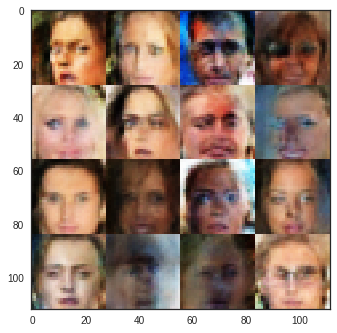

Epoch 1   Iteration 5910 Generator Loss: 2.329, Discriminator Loss: 0.390
Epoch 1   Iteration 5920 Generator Loss: 1.115, Discriminator Loss: 0.603
Epoch 1   Iteration 5930 Generator Loss: 1.010, Discriminator Loss: 0.681
Epoch 1   Iteration 5940 Generator Loss: 1.320, Discriminator Loss: 0.517
Epoch 1   Iteration 5950 Generator Loss: 1.041, Discriminator Loss: 0.652
Epoch 1   Iteration 5960 Generator Loss: 3.236, Discriminator Loss: 1.072
Epoch 1   Iteration 5970 Generator Loss: 2.789, Discriminator Loss: 0.918
Epoch 1   Iteration 5980 Generator Loss: 1.351, Discriminator Loss: 0.581
Epoch 1   Iteration 5990 Generator Loss: 1.833, Discriminator Loss: 0.546
Epoch 1   Iteration 6000 Generator Loss: 1.636, Discriminator Loss: 0.415


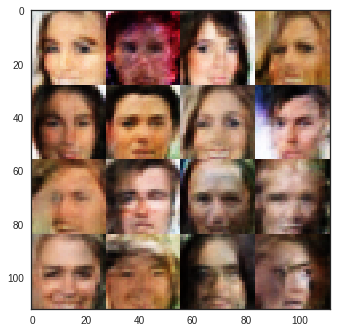

Epoch 1   Iteration 6010 Generator Loss: 0.856, Discriminator Loss: 0.763
Epoch 1   Iteration 6020 Generator Loss: 1.144, Discriminator Loss: 0.614
Epoch 1   Iteration 6030 Generator Loss: 1.033, Discriminator Loss: 0.592
Epoch 1   Iteration 6040 Generator Loss: 1.797, Discriminator Loss: 0.497
Epoch 1   Iteration 6050 Generator Loss: 1.476, Discriminator Loss: 0.463
Epoch 1   Iteration 6060 Generator Loss: 1.801, Discriminator Loss: 0.430
Epoch 1   Iteration 6070 Generator Loss: 1.621, Discriminator Loss: 0.435
Epoch 1   Iteration 6080 Generator Loss: 1.443, Discriminator Loss: 0.513
Epoch 1   Iteration 6090 Generator Loss: 1.397, Discriminator Loss: 0.541
Epoch 1   Iteration 6100 Generator Loss: 2.329, Discriminator Loss: 0.395


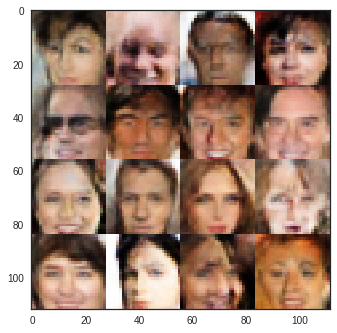

Epoch 1   Iteration 6110 Generator Loss: 3.252, Discriminator Loss: 1.025
Epoch 1   Iteration 6120 Generator Loss: 2.193, Discriminator Loss: 0.406
Epoch 1   Iteration 6130 Generator Loss: 1.014, Discriminator Loss: 0.679
Epoch 1   Iteration 6140 Generator Loss: 1.388, Discriminator Loss: 0.511
Epoch 1   Iteration 6150 Generator Loss: 1.104, Discriminator Loss: 0.674
Epoch 1   Iteration 6160 Generator Loss: 0.939, Discriminator Loss: 0.778
Epoch 1   Iteration 6170 Generator Loss: 0.922, Discriminator Loss: 0.752
Epoch 1   Iteration 6180 Generator Loss: 2.278, Discriminator Loss: 0.553
Epoch 1   Iteration 6190 Generator Loss: 3.152, Discriminator Loss: 0.691
Epoch 1   Iteration 6200 Generator Loss: 1.494, Discriminator Loss: 0.430


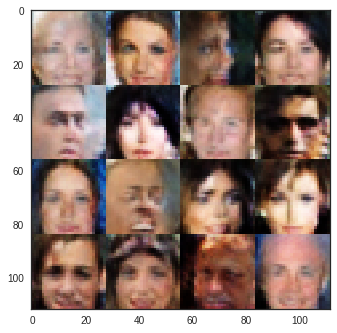

Epoch 1   Iteration 6210 Generator Loss: 0.780, Discriminator Loss: 0.840
Epoch 1   Iteration 6220 Generator Loss: 2.467, Discriminator Loss: 0.429
Epoch 1   Iteration 6230 Generator Loss: 1.978, Discriminator Loss: 0.371
Epoch 1   Iteration 6240 Generator Loss: 0.782, Discriminator Loss: 0.784
Epoch 1   Iteration 6250 Generator Loss: 1.169, Discriminator Loss: 0.543
Epoch 1   Iteration 6260 Generator Loss: 1.010, Discriminator Loss: 0.746
Epoch 1   Iteration 6270 Generator Loss: 2.051, Discriminator Loss: 0.606
Epoch 1   Iteration 6280 Generator Loss: 0.994, Discriminator Loss: 0.705
Epoch 1   Iteration 6290 Generator Loss: 1.032, Discriminator Loss: 0.727
Epoch 1   Iteration 6300 Generator Loss: 1.887, Discriminator Loss: 0.593


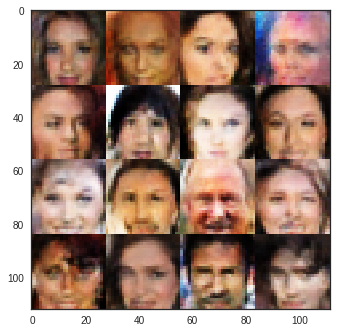

Epoch 1   Iteration 6310 Generator Loss: 1.451, Discriminator Loss: 0.450
Epoch 1   Iteration 6320 Generator Loss: 1.187, Discriminator Loss: 0.537
Epoch 1   Iteration 6330 Generator Loss: 2.662, Discriminator Loss: 0.621


In [100]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.